In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from scipy import stats
import numpy as np

In [2]:
# # download stock data direct to dataframe
# yf.pdr_override()
# df = pdr.get_data_yahoo('IBM', start='1995-01-01', end='2021-01-01', interval='1d')
# df

In [3]:
# read data
df = pd.read_csv('./resources/eurusd_minute_simulated.csv', index_col=0,parse_dates=True)
df

,Open,High,Low,Close
Date,,,,
2020-03-11 10:12:00,1.131530,1.131570,1.131390,1.131490
2020-03-11 10:13:00,1.131582,1.131466,1.131601,1.131775
2020-03-11 10:14:00,1.131731,1.131735,1.132045,1.131918
2020-03-11 10:15:00,1.131831,1.132011,1.131839,1.131831
2020-03-11 10:16:00,1.131876,1.131503,1.131536,1.131726
...,...,...,...,...
2020-04-29 23:55:00,1.123625,1.123868,1.123802,1.123832
2020-04-29 23:56:00,1.123699,1.123858,1.124040,1.123952
2020-04-29 23:57:00,1.124208,1.123977,1.123967,1.123771


In [4]:
for index, row in df.iterrows():
    
    df.loc[index,'real_body'] = df.loc[index,'Close'] - df.loc[index,'Open']
    
    if df.loc[index,'Close'] >= df.loc[index,'Open']: 
        df.loc[index,'upper_shadow'] = df.loc[index,'High'] - df.loc[index,'Close']
        df.loc[index,'lower_shadow'] = df.loc[index,'Open'] - df.loc[index,'Low']
        
    else:
        df.loc[index,'upper_shadow'] = df.loc[index,'Open'] - df.loc[index,'High']
        df.loc[index,'lower_shadow'] = df.loc[index,'Low'] - df.loc[index,'Close']  
        
# tidy up
#df.drop(['Open', 'High', 'Low'], axis = 1, inplace = True)
df = df.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'})
df['date'] = df.index
df = df[['date', 'open', 'high', 'low', 'close', 'upper_shadow', 'lower_shadow', 'real_body']]
df


,date,open,high,low,close,upper_shadow,lower_shadow,real_body
Date,,,,,,,,
2020-03-11 10:12:00,2020-03-11 10:12:00,1.131530,1.131570,1.131390,1.131490,-0.000040,-0.000100,-4.000000e-05
2020-03-11 10:13:00,2020-03-11 10:13:00,1.131582,1.131466,1.131601,1.131775,-0.000309,-0.000018,1.925271e-04
2020-03-11 10:14:00,2020-03-11 10:14:00,1.131731,1.131735,1.132045,1.131918,-0.000184,-0.000314,1.871849e-04
2020-03-11 10:15:00,2020-03-11 10:15:00,1.131831,1.132011,1.131839,1.131831,0.000180,-0.000008,2.254175e-07
2020-03-11 10:16:00,2020-03-11 10:16:00,1.131876,1.131503,1.131536,1.131726,0.000373,-0.000190,-1.502470e-04
...,...,...,...,...,...,...,...,...
2020-04-29 23:55:00,2020-04-29 23:55:00,1.123625,1.123868,1.123802,1.123832,0.000036,-0.000178,2.070706e-04
2020-04-29 23:56:00,2020-04-29 23:56:00,1.123699,1.123858,1.124040,1.123952,-0.000094,-0.000340,2.526191e-04
2020-04-29 23:57:00,2020-04-29 23:57:00,1.124208,1.123977,1.123967,1.123771,0.000230,0.000196,-4.368755e-04


In [5]:
# df = df[(np.abs(stats.zscore(df['open'])) < 3)]
# df = df[(np.abs(stats.zscore(df['high'])) < 3)]
# df = df[(np.abs(stats.zscore(df['low'])) < 3)]
# df = df[(np.abs(stats.zscore(df['close'])) < 3)]
# df = df[(np.abs(stats.zscore(df['lower_shadow'])) < 3)]
# df = df[(np.abs(stats.zscore(df['upper_shadow'])) < 3)]
# df = df[(np.abs(stats.zscore(df['real_body'])) < 3)]
# df

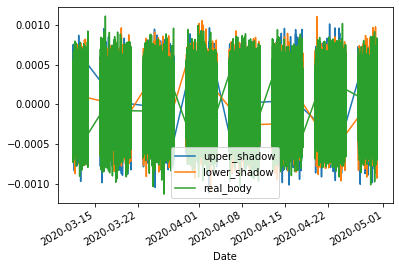

In [6]:
df[['upper_shadow', 'lower_shadow', 'real_body']].plot();

In [7]:
# data to csv
# df.to_csv('./resources/google_10yrs_ohlc.csv', index=True,)

In [8]:
# x = list(range(7))
# slopeall = []
# idxall = []

# for h in range(8, df.shape[0]-50):
#     slope_grp = []

#     for i in range(50):

#         prev7 = df.iloc[h+i-8:h+i-1,4].values
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x, prev7)
#         slope_grp.append([slope, r_value**2, std_err])
        
#     idxall.append(df.index[h+i])
#     slopeall.append(slope_grp)


In [9]:
# df['slope'] = 'neutral'

# for i in range(len(idxall)):
#     percentile50 = np.percentile(slopeall[i][0][0], 50)
#     percentile70 = np.percentile(slopeall[i][0][0], 70)
#     percentile30 = np.percentile(slopeall[i][0][0], 30)
    
#     if percentile50 > 0. and slopeall[i][49][0] >= percentile70 and slopeall[i][49][1] > 0.8:
#         df.loc[idxall[i], 'slope'] = 'positive'
# #         print(f'{idxall[i]} {slopeall[i][49]} is positive {percentile70}')
        
#     elif percentile50 < -0. and slopeall[i][49][0] <= percentile30 and slopeall[i][49][1] > 0.8:
#         df.loc[idxall[i], 'slope'] = 'negative'
# #         print(f'{idxall[i]} {slopeall[i][49]} is negative {percentile30}')
        
#     else:
#         df.loc[idxall[i], 'slope'] = 'neutral'
        

In [10]:
x = list(range(5))
slopeall = []
idxall = []

for h in range(6, df.shape[0]):

    prev7 = df.iloc[h-5:h,4].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, prev7)
    slopeall.append([slope, r_value**2, std_err])
    idxall.append(df.index[h])
#     print(slope)


-8.186969234260656e-05
-0.00018159619663986605
-0.00016623991895445834
-4.245052480613687e-05
2.601506207051685e-05
5.68126372619826e-05
5.285388654074908e-07
-1.2012980233766513e-05
3.534863025378421e-05
6.125764298752223e-05
0.0001066773041337843
4.7820470452375474e-05
5.997698262629747e-05
8.322207651456637e-05
0.00012864973958039982
9.562142191519297e-05
-2.7312541913193656e-05
-9.765946732229747e-05
-4.882167307074248e-05
-1.3705294793497913e-06
-2.4292074939658016e-05
-8.913239346584057e-05
-0.00010647780835990606
-4.503940906361859e-05
-1.0463432519292049e-05
5.0070502266819085e-05
5.6473824513014754e-06
-4.641723791527497e-05
-7.979808633562513e-05
-2.2432475012057474e-05
2.3557844756094684e-05
2.7342261591511985e-05
-5.0164808660957406e-05
-9.686990151160924e-05
-7.450949247755911e-05
-4.551914710788641e-05
-2.1018456510080166e-05
3.499092913246127e-05
5.4389984939806625e-05
6.0866163919648386e-05
0.0001733579796545648
0.00018662107155764662
0.00020797311027367373
0.0001568246

0.00012385204218650083
4.971847402508445e-05
-2.1307054345709456e-05
-5.56681028320849e-05
-3.0302005882054676e-06
4.147018379609957e-05
3.24102376131119e-05
-4.44818522110424e-05
-0.0001050625488435708
-0.00012154593759707844
-2.566587109067431e-05
3.287920339065664e-05
4.863396901324535e-05
0.00010181181468147394
2.5218362875656378e-05
1.1432611240014268e-05
4.611637424525306e-05
6.639609530409985e-05
0.00016670533459692827
0.0001460977033064248
7.988002456460475e-05
3.766803550131481e-05
-2.9843944124419155e-06
-4.10512738579838e-05
-5.6906932867484276e-05
-1.1831752795798956e-05
1.5463142968696886e-05
5.3065497690019114e-05
1.6919613702448545e-05
-3.6720686993119145e-05
-2.365172061702392e-05
3.131518986800863e-05
8.889262783824404e-05
5.073565045501383e-05
-7.199767757792852e-05
-8.056419884052702e-05
-3.494190726038848e-05
6.307980034305772e-05
4.817393494727096e-05
-2.3502229703975533e-05
-5.3187671517185287e-05
-9.04638468607999e-05
-5.926084839338319e-05
-9.026712842914454e-05

-0.00015234543408630953
-0.0003288033023547188
-0.00029212149988309125
-0.00019226181184346381
-6.583795962233907e-06
0.00016652677836104246
0.00012532599202794704
8.205483062915243e-05
7.175323654362575e-05
-2.418970141557786e-05
-5.2015122016180196e-05
-7.424628641548026e-05
-0.0001277522685980692
-9.717946300404901e-05
-7.443742172197343e-05
-7.361869253017517e-05
-5.083117071469356e-05
-6.796570993850005e-06
-1.953826662504099e-05
9.889447928790318e-06
2.6364969089054392e-05
1.7232921340593066e-05
1.498521951741605e-05
-3.0620945413861735e-05
-4.234774338240932e-05
-5.794457126273578e-06
5.914199647614194e-05
0.0001071990589888161
5.805760080233036e-05
-2.1147729183979005e-05
-4.9033076172033677e-05
-1.1543765791155458e-05
6.208867264294593e-05
6.389670940019077e-05
-2.131123242254951e-06
-2.538451223070837e-05
-0.00013971701587585096
-0.00020832550944565044
-0.00022920704381819147
-0.0002261736396856229
-0.0001434135138707049
-9.042488352934975e-05
-7.118525069915727e-05
-2.124151

-3.272638048292809e-05
-5.222870171357475e-05
-8.724967391025019e-05
-0.00010525335075344256
-0.00010458799783508166
-5.237697625515292e-05
-3.911113364576391e-05
-2.7238319347144824e-05
-1.4382354975128743e-05
-1.2860624449406723e-05
4.2487693837856005e-06
2.1506487745570626e-06
-6.913962756038838e-05
-8.571915111981188e-05
-0.00010051702825153441
-0.00012560740705704898
-0.00012386253089453626
-0.00016572515705279845
-7.174979776085611e-05
-2.6635689994702896e-05
4.938836871803964e-06
1.8672662215624137e-05
4.3241753392408993e-05
5.139413994208475e-05
4.236813310114496e-05
9.269573681571775e-05
3.511910901623505e-05
-9.843470161248203e-05
-0.0001650229384243307
-0.000247909127481849
-0.00018914495300517145
-0.0001613845501888145
-0.00017968327042596768
-0.0001059477383355656
-5.694895966796843e-05
-2.505954585192427e-05
-6.457063558233944e-05
-9.372213234382088e-08
4.094566086643159e-05
9.724200971557019e-05
4.2597944143496497e-05
-9.667223825284844e-05
-6.35464570024169e-05
-3.32838

0.00010468010836635068
0.00017257932862708715
0.00021483724937685356
0.00012488712845413197
3.474363585260765e-05
-4.5886765218639e-05
-0.00011673788209021208
-0.00012710595158000882
-9.435715919818844e-05
-6.429426752745382e-05
-6.874604994542289e-05
-0.00013052158334079245
-0.0001539355037345036
-0.00011424395721062464
-7.560351321189707e-05
-1.4999414815863865e-05
-3.230364426209942e-05
-4.624661801451158e-05
-2.733111547439382e-05
-9.424732054086338e-05
-3.862426746208403e-05
-5.101154936504315e-06
5.997496849179385e-05
0.00013023513051966252
0.00012050836877268712
0.00012047211308272577
2.97047851866461e-05
3.6772959992315005e-05
-1.4564154598950552e-05
1.795403053996836e-05
7.4451151452326065e-06
-0.00010574078143523736
-0.00012141117194783835
-5.551880182570468e-05
6.561732954637468e-05
0.00017854195629820604
0.00015850461100259673
4.8378333781307074e-05
-1.849050940987418e-05
-3.868789928673788e-05
1.3334836055589606e-06
0.00010031049765311107
0.00013282825587108694
0.000149423

4.381644070408086e-05
1.6761473821746976e-05
-8.359162440598756e-05
-1.7192677888644426e-05
-1.725667311169854e-05
9.081848300345197e-05
6.264012672971831e-05
-8.73820587580676e-05
-0.00015051247779171995
-0.00017600184184696221
-0.00010140230333806067
-1.0342633200788322e-05
2.119465030059331e-05
2.1624796305497187e-05
5.563985459506871e-05
0.00014959369770823906
0.00016705681441384624
8.846505410442518e-05
-5.463161990002519e-05
-0.00011425826352968739
-2.916757587039243e-05
6.564451607566912e-05
0.00012050877432825403
9.907662551669195e-05
7.943029011041603e-05
2.4658077359474007e-05
3.441607774334887e-05
5.193660241884502e-05
8.587189872284463e-05
9.479597330805945e-05
7.430303400586259e-05
4.075162220051887e-06
-3.8186302007892087e-05
-3.54086170752943e-05
1.4521134814149406e-05
0.00015628365201498796
0.00021130747971129794
0.0002257168049953906
0.0001286006950263152
1.1398660226236146e-05
-7.0407598120603154e-06
7.912910895147008e-06
6.678927739127705e-05
0.00010894603694591166
0

-0.00011071325904659091
-0.00014764406568574807
-0.00011638968096367998
-3.096021525883508e-05
-3.5176803314151964e-05
-8.027787261044583e-05
-9.810720629590542e-05
-6.643050288213104e-05
-5.262238730365798e-05
-5.4248249992339126e-05
-9.302098840988649e-05
-0.00011711924464026248
-9.313792720080372e-05
-0.00011196521822607331
-0.0001426526253496485
-0.00013927113316114514
-8.159237528588826e-05
-4.862859746890269e-05
-2.4698176085857783e-06
2.889580450122775e-05
7.811399912402984e-05
9.194696766772204e-05
8.696004766453048e-05
-3.348292101357231e-06
-3.548885787958423e-05
-4.928849887020359e-05
-9.99620562826431e-05
-9.861202425651694e-05
-0.00014632075004299418
-5.714726272689763e-05
2.6331622095976392e-05
5.309986373558395e-05
0.00012196984935086697
5.475142913207165e-05
0.00012241285988499052
0.00011060969338250182
6.767713652235941e-05
5.769995457653998e-05
9.662466120774483e-07
-5.4079671653473055e-05
-0.00017994732121791036
-0.00015863720040418806
-6.193112975017012e-05
4.402587

-4.969069652172031e-05
-4.8809100189517456e-05
-6.457506390118439e-05
-2.918672653422494e-05
-8.839195614340767e-07
4.228604425189353e-05
5.612450719361117e-05
8.09697358954864e-05
5.603073833602146e-05
4.843756867316529e-05
6.167616507113394e-05
-1.0834062318276771e-05
-9.13651345062494e-06
2.9220632431603555e-05
7.259144355289405e-05
0.00011452222903129972
7.056465051946681e-05
2.859521780649299e-05
1.7415713280466428e-05
4.7937822288757205e-05
7.24038575806052e-05
9.545315138055345e-05
8.733652059693675e-05
5.348772172213412e-05
4.405268889844383e-05
4.431451064970116e-05
5.34049969655559e-05
1.4567471018156476e-05
-5.619545471067245e-05
-2.926625284367379e-05
-1.253918940165022e-05
-2.2069579318850786e-05
-2.4778474205522372e-05
-7.644602856522465e-05
2.0936330855869657e-06
7.378102208519533e-05
0.00012698162748339125
6.796293374715656e-05
1.4770922911333529e-05
-0.00011889653058796413
-0.00018159453048660623
-3.923477249565544e-05
2.0956702253438486e-05
4.511760724177361e-05
-5.28

0.0001799214018686879
0.0001331478029224842
5.1394417513672686e-05
1.1995481577598e-05
2.6795677373714357e-05
0.00012680033963514693
0.00010948542047699572
-2.8003359296202568e-05
-0.0001084924858621994
-0.00012184449720158419
-7.743166790252776e-05
-2.3980941235657307e-05
1.7142541640424726e-06
2.8153373728523337e-06
5.35719265793988e-05
5.046071594392299e-05
-1.9961610235408324e-05
-0.00010027750970096339
-0.00011959231551468276
-8.277909813581008e-05
-1.4022520734036094e-05
3.444763909865589e-05
7.824230984381231e-05
7.381979162888186e-05
5.882166008579493e-05
3.835977602300034e-05
8.037361502901686e-05
0.0002027373219909423
0.00018803938467477633
0.00015951062994377097
5.707481316563623e-06
-6.282051735795324e-05
-5.12506710677485e-05
-4.628052864288357e-05
-3.0206265180554583e-05
-9.388860723751336e-05
-0.00014008020932811948
-9.629843560796659e-05
5.089652251537569e-05
0.00020311396093808387
0.0002337765123707092
0.00015160699188969675
4.5525960318482106e-05
-9.459055411653595e-0

5.46943490659535e-05
0.0001294301835038869
0.00013401119285481045
0.00011406027777332018
1.036728200067838e-05
2.1662207209471875e-05
1.184371672156015e-05
-4.840200850400045e-05
-0.00012190610999902597
-0.0001749637101628121
-0.00015377231743072262
-0.0001265484522649185
-0.00011393129848387141
-4.320707380651712e-05
5.0743846447431906e-05
0.00010351723106598598
0.00015361380497720402
0.00012622669306496803
9.941772808654826e-05
9.71960730794308e-05
0.0001240180057371143
0.00013875129617233473
0.00012337779135991324
8.487286254119653e-05
0.00010832946112930842
0.000202938740858416
0.0002247377025974995
0.00015182916072942199
3.643202160861225e-05
8.430525345937134e-06
4.035310813359505e-05
-5.652966185376584e-07
-3.0298045491972128e-05
-3.0050167236539418e-05
-6.984750126914907e-05
-7.33178763617115e-05
-0.0001100478781132619
-0.0001104075605506738
-3.0216027290785876e-05
-5.868712371146501e-05
-8.312384502284775e-05
-8.780398187102633e-06
2.231348293992852e-05
2.386605332771463e-05
-

-8.147042046600106e-05
2.918933903028887e-07
4.762921363481443e-05
0.00010387047586639664
4.362920914084967e-05
-4.264327561682713e-05
-5.2236442846553827e-05
-0.00010027097863629653
-5.0587434014803814e-05
2.348639113014528e-06
5.090627792392333e-06
-1.6287733608622013e-05
-0.00011968302368678963
-0.00015936124409476893
-0.00017640919004293656
-0.00018950102103132416
-0.00016419004408754214
-9.735247212103726e-05
-2.1047688415976043e-05
-5.037336173545626e-05
-9.084024215126885e-05
-9.817965527034734e-05
-6.103735254807674e-05
-9.711631928288611e-06
-8.41157268154369e-06
2.3165014458115253e-05
3.1298152323744334e-05
7.02821519977359e-05
6.93491154492909e-05
7.884538937601438e-05
0.0001034037916080921
6.212758109878092e-05
6.272573594725551e-05
2.6864683632377154e-05
-4.000303676177097e-05
-3.1476358903548274e-05
-1.250004559449902e-05
-0.00011833763439008661
-0.00020475050528319106
-0.00021434476658466206
-0.00011043560254031526
6.562417751394544e-05
0.00013051405233346358
3.009376099

1.2888421076695522e-05
9.636846818334989e-05
9.66012356321766e-05
5.188231559269952e-05
-1.4162639861803329e-05
-7.697366443779608e-05
-8.348750783162552e-05
-1.2265836473912551e-05
3.4877648704711996e-05
4.0762517567638494e-05
4.899681525771804e-06
-6.413928556425752e-06
3.6826359525199416e-05
4.312795186520724e-05
1.8559006655771704e-05
4.304421351506438e-05
0.00013069796870490702
0.00015949355485560536
0.00010652821697278992
5.953470705977182e-07
-0.00012803337260249847
-0.00016760217554134815
-0.00015672116232914315
-7.586300637287825e-05
2.55760315630571e-05
7.87947449926163e-05
4.571896925598118e-05
-1.8617565647116587e-05
-3.791380094233521e-05
-8.77476846209424e-05
-8.81438890382169e-05
-3.9153892507570734e-05
5.401855994480176e-05
0.00013191410269723926
0.00019550789603457465
0.00015373276646721835
0.00014447434961586402
0.00016608379054590118
0.00016054049905982472
6.045768230114046e-05
-9.28978486140375e-05
-0.0001865758608179169
-0.00020708802596602904
-0.000149867590649455

2.5394187434235607e-05
1.472607572801099e-05
2.546440483233159e-05
9.46104987059826e-05
0.0001505234055584559
7.798641112473083e-05
-3.253078379754637e-05
-4.989240745911783e-05
1.2664700208309121e-05
4.1467441365128366e-05
6.849412988543247e-05
6.798713057205585e-05
4.9682605695089424e-05
9.133171281823228e-05
8.287020954180769e-05
9.034334568116532e-05
0.00011645269699405159
6.765272222233333e-05
2.7414933731573223e-05
-5.257030727059409e-05
-0.0001382239898915838
-0.00011458277296967357
-9.195772146659565e-05
-5.5319065205949876e-06
7.139724668590031e-05
2.3214963895457075e-05
-2.5296223216342284e-05
-0.00010264388943286296
-0.0001918598501038371
-0.0001714336469773148
-0.00011344389825838075
-9.591202172019032e-05
-8.221699371113722e-05
-8.217903531402282e-05
-7.012968725235158e-05
2.833193625422226e-05
4.600302174688764e-05
1.7829269731839405e-05
6.934874368691446e-06
-0.0001332052230211378
-0.00022987263501128563
-0.0002649627093839646
-0.00025911804607301473
-0.00020228806840230

-2.2798972945858866e-05
-2.1642589245196575e-06
-3.029301087780212e-05
-0.00011116028241267007
-0.00014569829992980843
-0.00012502604229041038
-8.549281504435236e-05
-0.00010649575754171359
-7.925888042035201e-05
-2.067976303976593e-06
8.698257344890159e-05
0.0001693641222145992
0.00014800056325390277
0.00011920308491630838
6.524907466507469e-05
-8.012368665535342e-05
-0.00011480866907416233
-4.423531426027694e-05
7.452923746036344e-05
0.0001697506670705895
0.00013889443306065453
9.557986420543063e-05
6.353401239242996e-05
3.7539493524230144e-05
1.956743072839551e-06
3.70024880061326e-05
-3.3503764129916292e-06
1.8527161722703413e-05
9.53867428512556e-06
8.059436364016293e-06
0.0001150154549226956
7.543417017845666e-05
8.358652146369661e-05
0.00011231207403505916
0.00011274729350627677
0.00010237388302918316
7.206974325080218e-06
-0.00010147592202851552
-0.00010465880596073341
-9.833421133429444e-05
-0.00011355169277635913
-5.3194385334798255e-05
2.2945230116522278e-05
3.64695480919108

0.00010127999651368126
3.218497054975345e-05
5.984636667648591e-05
-1.1768945524748276e-05
-7.629431064317683e-05
-0.00015117784922333844
-0.00019611534903718475
-0.00010303824190847078
-4.78677188207044e-05
2.592831785552807e-05
0.00011909695727474467
0.00010656932138215504
0.0001635825069436159
0.0001685629070389938
0.0001379519369022475
0.00014529994844836303
5.45778505136374e-05
1.743925874353458e-05
-1.2157851060567993e-06
2.9142653823699405e-05
-6.446317677388792e-06
3.247385016980076e-06
2.412922705345988e-05
0.00010915096046197892
0.00013465312979272782
1.6530893064836685e-05
-9.47442420329292e-05
-9.245322164403992e-05
-2.9453184414562906e-05
0.000106462247814898
0.0001552973596311791
9.08923444512766e-05
8.243685097404364e-05
-9.322798498225816e-05
-0.00016119933130449572
-0.00010426295167713651
-0.00010648192099143028
-6.929264442168126e-06
-3.113183239378259e-06
-5.999583542954934e-05
-0.00012693427473000617
-0.00016766882585910194
-7.467342353417727e-05
4.701952400800735e-

-7.12001633605297e-05
-0.00010000349283658672
-9.406549147989997e-05
-6.453262121766113e-05
-3.5793674693640476e-05
-6.948453519159959e-05
-1.7558431686315323e-05
-2.6305732655584892e-05
-1.235970594535285e-05
-2.478317750265191e-06
3.759073501325983e-05
3.686970924059452e-05
-8.534977038350268e-05
-0.00017123653353658954
-0.00024387520418762688
-0.0001156564527093007
-4.216368389931002e-05
1.4012829591592003e-05
7.135882879147904e-05
0.00010242631556431903
0.00010848244099959103
1.6622718933678728e-05
-8.096904738510436e-05
-0.0001634864861489227
-0.00019422437385347991
-0.000150795500923695
-5.154419779980213e-05
-4.885578785973621e-09
-6.518470728054116e-05
-0.0001768103029038626
-0.00013658477172369122
-2.294130739697309e-05
0.00012301989407215164
0.0001424359430838962
3.941397883413522e-05
1.4337518845164432e-05
-2.0896599991959698e-05
-3.846162025742395e-05
-6.124015941404437e-05
-3.591226826216154e-05
9.167418270306095e-06
1.0385426567705025e-05
-7.402562073004493e-05
-0.0001808

-4.644778805928951e-06
-9.293915764385652e-06
2.999669865633159e-06
-3.14407821483842e-05
-6.990022109478745e-05
-6.25387154111312e-05
-2.5520002493317764e-05
-1.0427320029182674e-05
2.377526746941694e-05
7.913231456191383e-06
2.5010096230415613e-05
0.0001138630053129086
0.00013892769570711394
0.00015243062239782558
0.00011995026632145579
7.71529691213857e-05
7.299396964193239e-05
7.309901156928867e-05
4.847850377707186e-05
1.649688530211968e-05
-8.49946605361085e-05
-0.0001065969123633881
-7.283881638808776e-05
4.1456252583516044e-05
0.0001252275745564857
0.00015239875582211406
0.00014291564545743096
4.9507851006747044e-05
-4.635819761884541e-05
-8.114738808118194e-05
-9.11373078085198e-06
-9.873719306008333e-06
-0.00011078742752552718
-0.0001782431026606357
-0.00017541697269074508
-9.043772012509167e-05
-1.1626103286288548e-05
-2.024191074192494e-05
3.4172150712374896e-05
-3.660484489207416e-05
-0.00013642056392040302
-0.0002246983382353518
-0.0001715255308419206
-3.2466845297718375e

6.811466616283291e-05
6.315411904376234e-05
6.229906952204267e-05
-2.0238822199880602e-05
-0.00011386319404718127
-8.59740062555403e-05
-0.000122484487431751
-0.00014218405700432425
-0.00012430689937206196
-0.000190382470059447
-0.0001178583496655783
-3.109431945136354e-05
5.2125960462445775e-06
7.408713579279969e-05
8.628865821249666e-05
0.0001410236129821607
0.0001686950596822001
0.0001345178649809098
8.996795335187714e-05
7.969759692050271e-05
6.981104188141796e-05
1.051132340772476e-05
-2.511505351703303e-05
-0.00010340531200787596
-0.00011303690513577714
-9.051885550279693e-05
-3.4063002105355626e-05
6.456141287416451e-05
8.259919028164031e-05
5.4352221131259704e-05
1.8224313059289623e-05
-3.3550283732530773e-06
-8.503100056247438e-05
-0.0001421900737590631
-0.00012967744380496527
-1.5745623633423022e-05
9.30048144645479e-05
5.511711762566929e-05
-3.372979591031999e-05
-0.00014185567420292868
-0.00010534712662444435
-1.2408304963296147e-06
9.212503286244457e-05
0.00018240238172382

-0.00011498470311281928
-7.861832171403017e-05
-0.0001105968826944137
-8.906205021155245e-05
-0.0001226034055992864
-6.220622418882105e-05
-2.6984016563025295e-05
-4.03091420618118e-05
-5.677580688203676e-05
-5.338011242628227e-05
-2.7646647038892527e-05
6.709930106429951e-06
4.637326730378977e-05
4.626050108051949e-05
0.00010452228590256407
0.00011631928682136472
0.00014161723582990505
0.0001286600124526416
8.168554859289134e-05
-2.1587526780519896e-05
-9.881737158818905e-05
-8.075997217171782e-05
-3.816395915201554e-06
1.6830003147672024e-05
-4.065319861166206e-05
-7.201528341367336e-05
-7.695344428857443e-05
9.842779468960395e-06
5.599043326929288e-05
6.223505239923988e-05
5.1784900022866514e-05
2.909296023090313e-05
-2.3111668209230274e-06
-8.733081193572634e-05
-0.00014503958511140615
-0.0001759709380906527
-6.34924698521111e-05
8.904514741525649e-05
7.33856117505205e-05
2.1713128191280796e-05
-8.503211766086594e-05
-9.411530183096596e-05
-3.621147272476755e-05
-2.673571530693586e

-0.00013045126150299514
-0.00014245159078398739
-6.22967624073434e-05
-1.0704309492037824e-05
0.0001318270096325014
0.00018264819139865996
7.247800043690411e-05
-1.305076979334352e-05
-0.00010280278062297922
-0.00010751945727818236
-1.5841617375667028e-06
-2.3775696103811585e-05
-4.2863111260560416e-05
-7.661649029628849e-05
-0.00012522022859455807
-6.921968584143734e-05
-4.315516148121202e-05
-2.4709070019746095e-05
-1.9471332748888238e-05
1.4491558278928451e-05
-3.267446082684256e-05
-4.287528407542762e-05
-0.00012809115239735826
-0.00016243782257552297
-7.799494529376895e-05
-7.947927646680953e-05
-1.575172199512753e-05
5.13640289776518e-06
1.0806411449237886e-06
-1.8247632418644244e-05
-2.881392377602765e-05
2.0634516506223834e-05
4.302602545169787e-05
6.398927475299576e-05
4.344665148274807e-05
1.0158439067708969e-07
1.9953890648727326e-05
3.2463508053348636e-05
8.389935097765645e-05
0.00010883182245149393
7.397947908365232e-05
2.602174629933174e-05
-4.356449087403736e-05
-8.72985

0.00010555377979357684
5.9723740683348406e-05
-1.4674891490407127e-05
-2.924158097579177e-05
-1.5702166626541113e-05
1.2624040089681544e-05
5.014301947245948e-05
7.62711855831988e-05
2.458001930538689e-05
-3.4863861192779844e-05
-5.687531420708325e-05
-3.839450728047034e-05
-7.519833970803803e-06
-1.8427279907706762e-05
-4.449765647989157e-05
-1.366287778159503e-06
0.0001083477075370265
0.00016909521468857493
0.00020447638663869674
0.00016820579783560774
0.00018356245985458043
0.00015621030875923037
5.3552824367231194e-05
-3.237584735331645e-05
-6.464556479814921e-05
6.360588327849471e-05
0.0001584189323787344
0.00016814556747482003
0.00012320986575631299
2.4949017602504677e-05
-4.674740232237795e-05
-0.00010706546899532655
-0.0001712959225454114
-0.00013274371075762127
-4.2636293740949685e-05
1.3669328727505815e-05
2.1755118869370982e-05
-7.172840953622029e-05
-4.985259351888427e-05
-9.649843758419153e-06
-4.927856679448617e-06
2.7315321556642406e-06
-7.078453436777376e-05
-6.14435767

-0.00011521273093317852
-4.96945290841655e-05
-2.6720606350227882e-05
-2.570104054027134e-05
-0.00010008951213091866
-0.00016443677906048394
-0.00011937971615083587
-8.809178751405522e-05
-7.481496481573924e-05
-1.1462773707782148e-05
3.922534799567501e-05
9.140844312878206e-05
0.00016978587710152483
0.0001455899312273967
0.00012997596260972967
0.0002058703841997689
0.0002294166188490321
0.00023787193687410115
0.00014479447556126068
5.956842756105196e-05
6.388073307608267e-05
4.417871942696827e-05
5.3256647462940344e-05
3.9924298670479535e-05
4.5877485360557024e-05
7.181541590768336e-05
8.240340234675348e-05
0.00012056209880577651
6.457920581768307e-05
-2.2133173550153986e-06
-0.0001016831410321606
-0.00010078632754686457
-4.4183777535744544e-05
-9.718349283982519e-05
-9.645104845179553e-05
-0.00012067413634535562
-0.00014839178216980998
-0.00010355312765859549
-4.1925188605485e-05
2.8410357282293575e-05
4.190215624593208e-05
-2.6261964072382684e-05
-1.696354854234805e-05
8.28981501963

0.00013415934734726243
3.6285818560855e-05
-1.904868915796332e-05
-7.795654239417527e-05
-4.5892068635633446e-05
4.738409286850765e-05
3.214272802154472e-05
1.6003314006662885e-05
-9.520413471775236e-06
-3.950033107880113e-05
2.2125203990652765e-05
3.993814614140501e-05
1.197271039909964e-05
1.9100609124755864e-05
-4.088612907544587e-05
-0.00010343657221756342
-6.859372978185174e-05
-1.545191786573863e-05
5.843346264580163e-05
6.784648469813082e-05
2.447944567049998e-05
-1.280146926387893e-05
-6.2944184331614755e-06
-1.22309829961198e-05
-6.381444267793413e-05
-7.326511954763859e-05
-0.00014278999229568878
-0.00016622867925559782
-0.0001359316245040043
-0.0001259552756817106
-8.982998026254575e-05
-3.899761668741953e-05
4.6676589779859334e-05
9.21374480830961e-05
0.00011692390438891032
6.967451441457495e-05
-1.5625973710919894e-05
-6.890463498705479e-05
-0.00012838084739263955
-9.703886204821545e-05
-8.165574245302399e-05
-4.851873481857006e-05
-3.108961992435155e-05
-7.182702177588318

-6.299730444032647e-05
-8.666950184226252e-05
-0.00022906471909021065
-0.00017939800369137782
-7.046536337189657e-05
-3.0463315028894657e-05
-2.642525745990554e-05
-0.0002136330712218637
-0.0002579480408997581
-0.00015565092711340435
-8.773570628162198e-06
0.00018720122805051533
0.0001461803760832936
3.1730135538143856e-06
-6.858342654239014e-05
-6.715331714222117e-05
3.623934657981387e-05
6.242671774137065e-05
4.657520924251646e-05
9.524090528434393e-06
-1.538129558227297e-05
1.593448659096275e-05
3.146663687381146e-05
-2.2685322242033124e-05
2.366246726610566e-05
8.735111954971675e-05
0.00010136407862655351
9.610579923398089e-05
2.401863580432373e-05
2.1120439434141325e-05
0.0001375269443991023
0.0001398053125258869
0.00011623551890647122
8.778419501631607e-05
7.127831203419532e-05
0.0001309774404693709
9.760648319017129e-05
4.689938379920378e-06
-0.00010072391311595209
-0.00015879730295855767
-0.00010298640918515733
-9.188286878032416e-05
-8.68517794836432e-05
-7.780979442797432e-05

7.67079218633171e-07
-5.90564407612737e-05
-0.00014726725867155734
-0.00013975083113257903
-0.00012296393076496325
-0.00011471360113339824
-0.00011923108097438018
-9.305060689392964e-05
-4.4425575706008584e-05
1.3196541490700932e-05
0.00017900898662603915
0.0002637175734318209
0.00027096297685815787
0.0001849238003101439
1.362858821960522e-05
-5.090041733348816e-05
-7.721195489802658e-05
-0.00010983636076702386
-3.308591785067261e-05
-8.978702829409713e-06
-0.0001025684971319718
-0.0001667437860713994
-0.00019615018004448537
-0.00010462345767874304
4.994531187882956e-05
4.843796876481399e-05
2.3935311054268382e-06
-6.162615434011088e-05
-0.00016062209043019582
-0.00022533211429485168
-0.00021605555098884734
-0.00012248207686438306
-4.7369381550588235e-08
4.085322390532387e-05
-2.5386337203459065e-05
-3.113800558607327e-05
-6.768663245826367e-05
-9.306252134433368e-05
-2.2918077550926343e-05
-2.017228941526561e-05
5.6705880452256885e-05
5.074768494854887e-05
-1.9357127048058588e-05
1.20

9.36352775563032e-05
9.814892512720608e-05
7.632179033478792e-05
-2.1084196615861474e-05
-8.73077403610978e-05
-0.00011899168222413438
-0.00016840295679589892
-0.0001515141507877127
-7.039279969300871e-05
2.1496743856586067e-05
4.1881295890311426e-05
0.00010421068913588628
9.300717330644748e-05
9.787113121013659e-05
0.00012587649263260393
0.00012863027939882254
0.00015159566161428997
0.00011920704193191245
9.160446123854805e-05
8.406917567451711e-05
0.00014089964479260252
8.546044231971806e-05
-8.932615798145083e-05
-0.00018842286930809138
-0.00016378131156515876
-9.444849525384048e-05
7.930702152383341e-05
7.267385113718383e-05
4.597820068612535e-05
-3.694710371973109e-05
-0.00011647210455136837
-4.9954396082840805e-05
-3.9118539392801746e-05
1.773731616774299e-05
-3.272987543714301e-05
-2.2187605039603044e-05
-8.89602695781644e-06
-3.5026752015743236e-05
-2.514439260246082e-05
-2.4472994219437717e-05
-9.855853125317894e-06
-5.9073504353390765e-05
-0.00012524672759075539
-0.0001079212

-9.990668209791665e-06
-4.0087535612953753e-05
-8.262892739758777e-05
-0.00012797773630048858
-0.00012974239594159
-0.00012088186628924636
-8.924894527291284e-05
1.8393935517480033e-05
0.00010146393598335912
0.000180556641946672
0.00014292569459755102
3.435886555218648e-05
-1.1588578304833064e-05
-5.7855647464655215e-05
-1.6462857448273915e-05
4.902004569808938e-05
7.412517588101242e-05
0.00010027072071336907
0.00011283788019009756
0.00014717440043205966
0.00010888167531912796
4.419391062797651e-05
-5.1596105053808296e-05
-6.295678122214543e-05
8.686532947788095e-06
5.128636852769208e-05
9.689990749361943e-05
6.920815527009517e-05
3.0020055528479086e-05
4.7036636136676973e-05
8.417616989295774e-05
0.00018610494148558755
0.00030392834021180097
0.0002707267134256064
0.00013423480614589424
-3.227655894306736e-05
-0.00010952217989812496
-3.095188945034799e-06
3.376213003221107e-05
6.179603104228271e-06
-6.655273463334055e-05
-0.00012564836276078852
-8.612570016168775e-05
-4.100182247148698

8.41469261668948e-05
7.765944715463214e-05
-1.9258328446203345e-05
-9.237013330154475e-05
-7.949423898514497e-05
-9.041210753391038e-05
-2.488398507853873e-05
2.0281457395054938e-05
-3.6108970834214385e-05
-9.045854691445144e-05
-6.809846769297857e-05
-1.3251084363119503e-06
8.398883969600313e-05
7.969666652056784e-05
2.1756005278272817e-05
3.341557564804365e-05
8.247186392562611e-06
-2.535675673966953e-05
-3.452743041791884e-05
-7.498965178300843e-05
4.462026993645729e-06
3.6874267090158956e-05
1.0372873063912991e-05
1.7198678401775247e-05
-2.217927194174685e-05
-1.9929273734198284e-05
2.0929394010105185e-05
-8.694345370896528e-06
-3.595454389178077e-05
-8.514272565496306e-05
-0.0001193546124555578
-4.0086241910985976e-05
4.010410661674513e-05
0.00011494802320408671
7.459355549397362e-05
-3.9672892177011755e-05
-9.940924593649926e-05
-0.0001850037294071294
-0.00010082819272350108
-1.4335061632375634e-05
-1.222846442772152e-05
2.3796659297947722e-05
-8.17661020812599e-05
-0.00011406553

-7.893711926079129e-05
-0.00017029419466918494
-0.00022786776159666733
-0.00011086795601322752
4.375854434046645e-06
0.00016507947639978762
0.00015600167453819758
6.758588461481807e-05
5.3309310338200966e-05
5.4219317542858474e-05
8.91980653234592e-05
-5.974957257759428e-06
-2.229436156264697e-05
2.3219270333019183e-05
0.0001432575947611703
0.00023353959613328092
0.0002254001385841864
0.00019929488132184315
0.00016261323902766467
7.948476940955462e-05
-2.306590323126745e-05
-7.681407022983589e-05
-3.602390306662873e-05
-2.017175944055705e-05
-4.388654438913786e-05
-7.274567180652891e-05
-9.092257119411862e-05
2.6657121537954077e-05
0.00010762044785934678
6.637107440814472e-05
3.057007382538668e-05
-5.0330201923332046e-05
-6.254066938122804e-05
-6.828714746691667e-05
-4.930628017378869e-05
-2.3214627067336124e-05
4.661248324056012e-06
4.772635146341742e-05
-3.557510041041212e-06
1.1419978244764374e-05
7.54107785070346e-06
3.81299858748907e-05
-2.702152316162998e-05
-0.000100986191053853

-0.00010372979005439653
-0.0001687275308407843
-0.0001765824907877134
-0.0001317551211234447
-0.00012614764423306559
-0.00013197389846337783
-7.815767241290406e-05
-1.8280947289572858e-05
3.36497601292729e-05
-6.255992756560857e-05
-0.00015435668471528441
-0.00015688150864248131
-8.08269233580683e-05
6.986619743560851e-05
4.413415258290865e-05
1.1355698463111352e-05
-8.690295307600682e-05
-0.0002168336818894279
-0.00021080058666966828
-0.00017945344366394612
-0.0001207322685513379
-6.252761335123758e-05
-2.4860164970386123e-05
1.127089809120907e-05
2.7417927702111378e-05
2.7340880823345517e-06
-3.8663669661476166e-05
-3.1992906808575584e-05
1.06635868700522e-05
5.16497917572023e-05
3.8089747488179176e-05
1.0762691923571488e-05
-6.180086064389023e-05
-4.4014175032591755e-05
3.872776793611976e-05
5.178932427862826e-05
8.319459379528827e-05
5.87846819615212e-06
-3.53022206540432e-05
-2.5181925575767927e-05
3.455334262034704e-05
0.0001021780049186738
9.316324943857701e-05
3.23536163701954e

-2.0068328803701797e-05
-2.9985800376275407e-05
2.694463347630016e-05
1.5300310388366433e-05
6.247574861562022e-06
-4.0908967066077834e-05
1.7105168433539932e-05
8.376987010145777e-05
7.444577241668694e-05
-2.826307115368909e-05
-0.0001076095012734868
-8.125760066621802e-05
1.0266288113580658e-05
6.186768648595021e-05
1.4646641428206487e-05
-8.308666555811861e-05
-0.00014073302419257417
-0.00019291131787262385
-0.00019122921344647548
-0.00013895127338963144
-0.00011501287118562687
-8.46603316892347e-05
-0.0001040786868706567
-0.00011273186692524196
-0.00010746230334188756
-6.857231656398621e-05
5.835092462569414e-06
8.307929946649306e-05
0.0001317763280811679
0.00012489438559211142
0.00010496277752152228
0.0001598062985753268
0.0001118479757386881
4.197632302351817e-05
3.4639388426338516e-05
6.813012842554755e-05
0.00013681509744185584
7.612625237707338e-05
-8.452064566786266e-05
-9.404290090047063e-05
-4.0976423844885094e-05
4.7317808750180217e-05
0.00012654040605342143
4.714970700305

0.0001256242115390549
0.00013542405815005764
7.761215387553922e-05
1.0245051516655224e-05
-4.760203059199775e-05
-8.244919292996756e-05
-1.7755782298900513e-05
3.0430510310019978e-05
3.0264129050050492e-05
4.420267077880347e-05
4.791049173731299e-05
8.977267336041095e-05
0.0001391656602406144
0.00011290500583303054
7.713956295922753e-05
6.976631165347414e-05
1.9580454870027355e-05
-6.4085864541985065e-06
2.406677881063857e-05
6.366982496233132e-05
6.913050761985229e-05
9.669278493662504e-07
-9.312638822764897e-05
-0.00012096674368116123
-7.421189143426156e-05
2.583331758723162e-05
4.973757418411662e-05
2.6061021572876264e-05
-2.5476996926743212e-05
-6.996715172322699e-05
-1.764887985900021e-05
7.082846139616628e-06
3.978559363924106e-05
3.364227373203743e-05
-1.4499131654410747e-06
3.1393046995686906e-05
5.4663721571968085e-05
0.00010908549298320747
8.834769448249347e-05
4.007537751649082e-07
-0.00010964103503350309
-0.00011011440637058723
-4.673278875477749e-05
9.092707761970686e-06
6

5.864596418803103e-06
8.36917981450469e-05
0.00010645476195105808
7.825905793295007e-05
-3.065633357612896e-06
-0.00014318202134635527
-0.00015556895223289846
-0.000155406220051324
-4.656783841430201e-05
3.539613490997073e-05
-4.6063561949183376e-05
-7.460076249430348e-05
-9.669217218024607e-05
-3.15266281752713e-05
8.737255213624451e-05
6.701690085679779e-05
-6.45722832544049e-06
-8.532550879740697e-05
-1.4039419138867083e-05
9.718487859933234e-05
0.00012384641663889528
0.0001081981409081223
4.808147946482322e-05
-6.5267384384171125e-06
-0.00010955157065382082
-0.00012131751803685643
-0.00013954665870150596
-4.179814692806261e-06
8.709560873403355e-05
4.058301060205771e-05
2.777641872571124e-05
2.0038935442490138e-05
6.902669561565933e-05
7.312199681928089e-05
-6.386070361852348e-07
-7.429419296520746e-05
-3.546571090693451e-05
8.692580570646147e-05
0.00015513170522223342
8.78557801957669e-05
-4.334850180043315e-05
-0.00011705785137392511
-0.00011804033790259184
-2.9156440107702686e-0

-4.2089010620482985e-05
-9.227073128896812e-05
-7.726539369656837e-05
-6.11457279088956e-05
-0.00011978075583018999
-0.00014690506029462204
-8.645144436136842e-05
5.929912908375634e-06
6.898727997866061e-05
6.271934008770242e-05
2.898430859787915e-06
3.073129548449849e-05
8.516281541552928e-05
0.00015348271473822895
0.00010553458059652243
8.339029247890207e-05
7.995518303161031e-05
4.9320504227168274e-05
6.234617307898649e-05
1.646941064026297e-05
2.713198308299525e-05
0.00011021683964826945
3.934725316012688e-05
-4.6200532616813566e-05
-8.374399942185918e-05
-0.00010296987527098623
-9.165383197025091e-05
-0.0001278412236856319
-0.00018137739005783527
-0.0001102741888659331
-4.0621354118108856e-05
7.697511391548951e-05
0.00012148189599763271
0.00014296674256022434
0.00015723967936274175
3.730388178782018e-05
-4.441815771105695e-05
-0.00012005724837116372
-7.216031689647462e-05
6.62023738868367e-05
5.250651062607137e-05
8.635984893579086e-06
-6.239639634952887e-05
-9.777380975246609e-05

0.000130607192518295
5.7445110953580074e-05
2.8141637752931994e-05
-2.991971456636211e-05
-0.00010057905327403028
-0.00013417721266670846
-0.00020830287802318104
-0.00020149280508332537
-0.00014687773351613754
-9.924580434093056e-05
-5.306744879041148e-06
0.00013320920252053449
0.0002472081369438994
0.0001598588869606399
3.9138149222783805e-05
-0.00013692250361589943
-0.00017675153097158615
-6.109474309496931e-05
6.675746387219128e-06
8.61539968620928e-05
2.9028060482261256e-05
-6.185235020288449e-05
-0.00011375625718976768
-0.00021285108323954027
-0.00018942875642304904
-0.00013821093379999818
-5.757448709347024e-05
6.3407627588008e-05
7.000431653105822e-05
4.36887746380954e-05
1.5960499891631842e-05
-4.4080865117068774e-05
-0.0001533973327807914
-0.000193524562249503
-0.0001792711063899999
-0.00014164469099442467
-6.257782626146735e-05
-3.7397223874857666e-05
6.801736588557539e-05
7.962765533202632e-05
2.019303076590262e-05
7.952503596309057e-06
-4.2039463858700726e-05
5.437627153321

-0.00018945833333896547
-0.00021435000199436784
-0.00010792210632879496
-6.497305656176789e-05
4.292909673748735e-05
0.00013344890570792247
0.00013178327408074343
0.00011277877347659615
0.00011622118956322591
5.876752012405895e-05
1.987282770743448e-05
-6.263118611287144e-05
-0.0001224153436623521
-1.6786626766451817e-05
6.922405680629407e-05
8.268866595491088e-05
0.00010529889792318948
0.00010587329422970804
0.00016196926299709704
8.321740197201333e-05
-7.205077468208643e-06
-5.883897488061507e-05
-6.190799512111323e-05
7.678923889524736e-05
0.00010990297306365804
0.00010793898890633092
9.023104070837729e-05
1.8223036692366357e-05
1.9596237098884475e-05
4.553936200721865e-05
8.139083504676848e-06
7.511020510531097e-06
3.653969376435917e-05
6.231511809622337e-05
9.570171117603277e-05
0.00011642579020900713
8.113749348730437e-05
0.00011629254513072507
0.00011516631859016525
6.093190426350592e-05
7.86626746781316e-05
2.5484971882971943e-05
-2.3008367855403833e-06
-8.040203204942032e-05
-

-3.4252340555029906e-05
-5.084627523135321e-05
0.00014470995729483073
0.0001345860040088187
0.00017392003147467252
0.00012136914274969436
5.153398814741195e-05
7.688675829358172e-05
-2.7673226817181984e-05
-2.8805487365435314e-05
3.326100688711975e-05
0.00012403968765692941
0.00013151387617993393
8.544057007153771e-05
0.00010740215716891211
0.0001854989920965
0.00021053389179843675
0.0001529014436455256
0.00011039553979113048
6.707844842253063e-05
4.707512228634414e-05
-1.693922142367299e-05
-0.00011251916328560708
-0.00013709730063322657
-0.00011099788626138807
-6.517582091765117e-05
-4.2400142691856324e-05
-4.8832177774293946e-06
-3.0063218851328346e-05
-1.1429420124198231e-05
6.55398876420632e-05
2.904569716315475e-05
3.947607024876732e-05
1.943036719458391e-05
-3.563381385278675e-05
-8.682435126794453e-06
-3.645453366125651e-05
-3.1868595524708886e-05
5.8654899928400894e-05
6.786320218361563e-05
9.371729518070637e-05
8.992640154210642e-05
1.7789390514555414e-05
1.7183270251797112e-

5.347008929876829e-05
1.129695076125259e-05
1.3737669753677297e-05
-2.0308643343125432e-05
-5.4980380332936286e-05
-0.00011596362171153452
-0.00011692883022675905
-2.9014653684367178e-05
3.7635258204460344e-05
4.395205065521601e-05
-1.1698509029933746e-05
1.7994749217487005e-05
7.216966024827799e-05
0.00014363321583830136
0.00012902354698509643
-5.8227445309655405e-05
-0.0001298807142647851
-0.00015977672602158767
-9.868083619233304e-05
-3.252614226274542e-05
-8.817636972091592e-06
-2.8023370487306743e-05
-0.00013573659213084177
-0.00017680970388547215
-0.0002045929514115974
-0.0001616850872766973
-6.150409937308866e-05
4.303582297859876e-06
0.00011658196787309728
0.00020943463403326758
0.00021885453861760775
0.00015445355297742937
0.00011641209725627989
8.621442085925413e-05
-1.0327107879049003e-05
-7.256781240472243e-06
-1.9709167594594846e-05
3.383534119594245e-06
-7.69318666553609e-06
-7.041938181207019e-05
-0.00010349222031726946
-8.698482516054096e-05
-4.5954558768057656e-05
3.18

-4.6571649400006804e-05
-7.089583758774775e-05
-2.6942445877287115e-05
6.913052822465904e-05
0.00017793304840261204
0.00011011531124356378
-2.8202987760095334e-05
-8.182949551538421e-05
-9.053819155500076e-05
-3.26342028563964e-05
1.1803341510185916e-05
1.174871654860965e-05
4.727906017090167e-05
4.06366615720799e-05
-1.4041454431912293e-05
-7.177789657744072e-05
-5.8050366510187246e-05
-3.0447306926228992e-05
2.1357257296283907e-05
-6.879892104061369e-06
-6.352036521235504e-05
-0.00017886511854099397
-0.00019560857909652898
-5.69514304776142e-05
0.00011589635528472809
0.00024046297717466027
0.0002417442394267333
0.00019272042213214213
0.00012069025761880515
0.00010959888474253443
6.932108331851872e-05
8.06093416463316e-05
7.351046505010839e-05
2.8628476635317314e-06
-3.293912941537691e-06
-3.4006695674748676e-05
-2.2647236203732214e-05
-3.534013466213182e-05
-5.235392374285386e-05
-5.2035723718169004e-05
-4.316692969503766e-05
-2.042646581559282e-05
-4.5038358378723946e-05
-5.10332893

-0.0001034747309353712
-3.0476132589707386e-05
2.6434825382049e-05
3.9325230901443575e-05
5.4930175123391046e-05
-1.5680933719530722e-05
-5.989159694619328e-05
-0.0001021650342079461
-0.00010329278648737451
-9.932320677923379e-05
-8.030839645349897e-05
-5.813852214093807e-05
-2.834249085226226e-05
2.727592443310112e-05
3.4843112407112466e-05
4.081228814840632e-05
6.760945175290357e-05
6.041110236825187e-05
1.800173778747638e-05
4.79787498689932e-05
7.545833217255106e-05
0.0001497383500591143
0.0002062588019847711
0.0001791259709406079
0.00018451965360910538
0.00010302423047205967
7.806197816613293e-05
5.190115557283104e-05
3.7229495712498564e-06
3.281122786265023e-05
-3.827408193199933e-05
-2.68025023928864e-05
5.181053081932952e-05
4.6202922834459595e-05
-1.118858510893439e-05
-0.00010907629142478115
-9.811787458686717e-05
-1.0985734780999402e-05
9.641175583881002e-05
0.00012425960265602943
4.8281046404663465e-05
4.788878184633916e-05
-6.578754890544936e-05
-0.00014026031489722257
-0.

-3.7446268782437286e-06
2.4730782807935727e-05
7.431529997756759e-05
9.052846370047885e-05
0.0001512320530799638
0.00016398053429647066
0.00019061429100193373
0.0001555529684891699
1.532580510295034e-05
-0.00017232489781329188
-0.00021010529860452377
-0.00010005048955854524
-8.28480790489028e-06
3.717533218994262e-05
-4.032048828135349e-05
-0.0001328200586000694
-0.00014009925958136105
-3.665380771606941e-05
7.765120041904884e-05
0.00017153323694294454
6.454144209493418e-05
-7.668736525892062e-05
-0.00018302573797095435
-0.00018159865423530432
-0.00010734960364084946
-8.086369625637247e-06
7.446763002754153e-05
0.00019189247643036644
0.00027845786365074957
0.0002069216373442373
8.120365670600816e-05
-7.531829522753331e-05
-0.00010613706498421306
-6.0318566059169855e-05
-5.331189365220812e-05
4.057256151286382e-05
9.091178875844098e-05
2.5458002637512857e-05
-3.480620738582907e-06
-7.592938986689113e-05
-7.482835762850915e-05
-2.9780687841207687e-05
-5.6274021926960854e-05
2.27314318622

-0.00011108834715496397
-0.00012730891134449251
-9.630859137959025e-05
-9.895494721838816e-05
-8.634615645464194e-05
-9.129994682770537e-05
-3.251050410746359e-05
3.941599895700421e-05
0.00011492465771909544
8.62279189416615e-05
8.52187324695386e-05
0.00011733870338435093
7.891475811319105e-05
5.768622289856751e-05
4.523397525380002e-05
-2.319775980108574e-06
1.937138638399283e-05
1.9031274099923224e-05
-7.313057208748753e-05
-0.00011497411152985305
-0.00014547298965064125
-0.00012687390760428576
4.2109865698369835e-05
0.00015876645733672314
0.00014377204426361257
0.0001273841049708624
2.0300849398879885e-05
-5.945086509608899e-05
-1.0143938596152148e-05
7.440420021143091e-06
-1.7720539525623027e-05
-6.821503407650198e-05
-0.00012459473163564105
-0.00011738827219367477
-6.931130350085191e-06
4.045420313747439e-05
8.54472602724421e-05
8.547779627932073e-05
3.1860397052385636e-05
6.989867937443606e-05
5.068649462058872e-05
3.531845096496067e-05
2.7320406620967575e-05
-4.2028988592401895e

-5.2408515660751224e-05
-5.6811661124323014e-05
-8.568273055484799e-05
-8.824476432502949e-05
-0.00010014830982605361
-6.511178262509354e-05
-8.209028114536388e-06
6.962414749083212e-05
6.531847619222209e-05
1.8169949500235207e-05
-3.833438717337767e-05
-5.446770575201487e-05
-4.102404127550585e-05
-7.92561653396584e-05
-5.1561106076891686e-05
-5.937270003499862e-05
5.528351587624769e-07
-1.7174052200474854e-05
-8.727318257673033e-05
-8.428018323438647e-05
-9.24322201645289e-05
-6.45508029149422e-05
-7.669886918555414e-05
-0.00013429465562950771
-9.66403611266209e-05
5.665061355197843e-06
3.903166422858373e-05
1.0250676702527884e-05
5.5140050187363345e-06
-2.166566489927302e-05
-5.20697955127103e-05
-4.8604915175376465e-05
-5.215245081267029e-05
5.754254254131119e-05
0.0001344775292290601
9.625060270135322e-07
-6.598908279347171e-05
-0.00013578740804474077
-8.610931684973623e-05
-1.5023457085883152e-05
-4.5599336898427546e-05
-2.0279723863025903e-05
-2.3883444452410532e-05
-1.723741899

2.621705457153123e-05
-0.00011049107797984626
-0.00015698492638653862
-0.00011425426511859627
-7.80774821175001e-05
-2.5445198266460525e-05
-4.772110101898264e-05
-1.2459892619598457e-05
2.652272686933799e-05
3.822210545905147e-05
8.773482691408763e-05
8.612411959876277e-05
-8.679184721471778e-06
-6.96373414540874e-05
-7.458565575060306e-05
-3.246636912319634e-05
6.835415867423311e-05
0.00015553174911082658
0.00019700834393920896
0.00017874882488166932
0.00011485941888280672
8.323625359141218e-05
9.899219156941364e-05
0.00011311242384304254
9.058615958517091e-05
1.5579576964741548e-05
-3.2442225950490847e-05
-6.204267700413713e-05
-4.1774617324219504e-05
3.2205796862738725e-05
4.364172836630598e-05
6.753146140181521e-06
-1.821757192153051e-05
8.783095985398504e-07
0.00011108696554529285
0.00010243514565861923
9.073341765226673e-05
4.4173871734476405e-05
8.243586707981088e-05
0.00010747067266272393
8.5849285557571e-05
8.964648142006926e-05
5.913219736108922e-06
-2.0287536508489803e-05
-

-4.915585149838364e-05
-0.00011858637672446104
-0.0002066200775063809
-0.00017868338763740168
2.283790624399984e-05
0.00014207038559903575
0.00018389040001174362
8.23664422874515e-05
1.6643495174051283e-06
-1.3250842692835719e-05
-7.162342699291724e-05
-0.00011433765442665501
-0.00016266728797909025
-0.00021992847774898738
-0.00014498961527589226
1.738958644605937e-05
8.189002336178586e-05
0.00010491314173093347
-3.679293551710483e-05
-9.616069483349144e-05
-1.0010282939365568e-05
-7.925030345234952e-06
-8.613274672120142e-06
-0.00013277038879502267
-0.00026617058250293367
-0.00036656559245635824
-0.00039587828401983495
-0.00031582358562400883
-0.0001486820670526523
-1.903964879046427e-06
9.1442471101022e-05
0.00013760766821728778
0.00017608757562190825
0.00015356366265606436
0.0001336183581606143
0.00015549525484674921
0.00014344485602377777
0.00011940069917624197
6.282507032582263e-05
5.877859170355659e-05
1.627820764726895e-05
2.6982117304830136e-05
-5.44636942135357e-05
-0.00014099

3.772298030568777e-05
3.1593330314927395e-05
-3.48006418640523e-05
-9.876296847299848e-05
-9.908475970403785e-05
-7.771309698278994e-05
-3.1303408941951715e-05
-1.5039551180895395e-05
-5.465394424204462e-05
-4.8681846981279976e-05
-2.8548479439294284e-05
-3.0163915432424027e-05
-1.4627376570275353e-05
-0.00012606076775574239
-0.00012622564806565872
-9.904481305635927e-05
-6.968178023709637e-05
1.0107905834710885e-05
-7.501759950188092e-05
-0.0001009893202984058
-0.00019648051524925327
-0.00014432697035833276
-5.6614035758206783e-05
2.2112033137267064e-05
7.997228923759537e-05
2.7536186731880188e-05
3.756543081228081e-05
-1.560544500796013e-05
-4.841340650374448e-05
-8.843035889580798e-05
-7.689938233466088e-05
-7.425049675870988e-05
-3.382738995822976e-05
9.296429861826995e-06
-7.0514154888456915e-06
3.1865849962509074e-05
-3.2223625085370246e-06
1.320862759324193e-06
1.4307292595905353e-05
-6.945765149681816e-05
-0.00014407644314335944
-9.582406412154132e-05
-2.1051319901355116e-05
0.

6.825590090036027e-05
3.416179082693649e-05
-3.7622584275309736e-06
-2.770611962279457e-05
4.882582281291459e-05
7.202251276541284e-05
9.924030255517025e-05
3.8870406953495085e-05
-1.3051824503818033e-05
0.0001137533089890841
0.00015866273895619455
0.0002140887076711673
0.00017583882693532617
0.00016369737106813886
0.0001956476044590705
0.00021505970060333726
0.00022195524110737443
0.00017972307138895973
0.00018363886459715761
0.0001375338523495806
0.00014116355064648368
9.734779535046645e-05
2.1038352515789784e-05
2.6726385293773802e-06
-2.658894990501537e-05
-3.672621721368952e-05
-1.8542652710107357e-05
-2.2964554325377584e-05
6.721466337820115e-05
9.219712160390969e-05
6.664139705490069e-05
-2.1043060279279935e-05
-6.810665931240578e-05
-6.087227492075354e-05
-4.091008276918551e-06
6.479414395501593e-05
7.420845500698548e-05
8.684346643170749e-05
-1.449265841180214e-06
-5.4307941797038245e-05
-0.00013855460932055141
-0.00013307848785399924
-0.00011468810954842202
-6.100360526213322

1.8984246618503066e-06
7.492814059610886e-05
0.00010192598330840409
3.034491103752757e-05
-4.2020718038249255e-05
-8.821917363646126e-05
-2.3862311259592597e-05
0.0001180703366578717
0.00013595987879202464
0.00017523870514597474
0.00018196360302527028
0.00012138756255217765
0.00013602321847026034
6.436704749339661e-05
2.4798003956760797e-05
2.021169637003162e-05
-1.806529977195215e-05
-1.7248172729877888e-05
5.023153976253525e-05
9.350841847906023e-05
0.00015010363223273427
0.00013875068468029994
-6.627396105147731e-05
-0.00017403700855831428
-0.0001679753408023288
-5.2789134819741795e-05
0.00010203598547915417
7.822360632336878e-05
-2.7390996148968228e-05
-0.00012389432814010614
-0.00016843113650693022
-0.0001557731476075963
-4.185016213347215e-05
-7.155156611422519e-05
-0.00011757436823107704
-0.00014448246493814487
-0.00011542945491833657
5.9827644739951506e-05
8.941229163399456e-05
9.542128405528595e-05
3.687230489231031e-05
3.7487575431205402e-06
0.00011139877177375191
0.000116261

2.5493225389872088e-05
-9.844451589269276e-05
-0.0001289420766036331
-1.9384880950190644e-05
0.00014279085546533565
0.00011159251285617345
3.98253335874621e-05
-2.8277797999298748e-05
2.1653453097481014e-05
6.111790405605166e-05
3.4404323653980387e-06
-5.044631495088048e-06
6.52624902185428e-05
0.0001413952074019287
9.032103645276735e-05
-1.861818817299188e-05
-0.00012537592113235352
-0.00012277600745906893
3.421922614379458e-05
7.595092691201622e-05
0.00011222729301851864
7.224114073800525e-05
-1.0289395382900857e-05
9.664306852186223e-06
-3.5701778676622276e-05
-7.590231854401886e-05
-0.00010101514315685733
-7.860074318093435e-05
-3.735050425182074e-05
-2.1829874703183095e-05
-4.186811441007077e-05
-4.31476345825077e-05
2.3091618036819028e-05
6.41658354595176e-05
6.420318743347587e-05
1.760241844919186e-05
-7.413075916913315e-05
-8.301321529415873e-05
-7.882491062918274e-05
-6.019075337846403e-05
3.4997022519212e-05
7.197089284964875e-05
8.22228561464522e-05
8.074630914418625e-05
7.3

4.690232690047758e-05
7.440420467303978e-05
7.568105217183874e-05
-5.943133433405912e-06
-6.260692297317405e-05
-7.192946684175805e-05
-4.121325049084579e-05
2.5933957603396786e-05
0.00010460497691142657
0.00018582739358972145
0.00021667317573590417
0.00021920760983831224
0.0001394315966850135
9.999483743226013e-05
0.00010151856139988258
6.528438864357166e-05
6.261141070951215e-05
2.741834401447374e-05
6.26096048989666e-05
-8.160278547109101e-07
-0.00010340313801118218
-0.00011644742405301223
-9.344097392978147e-05
3.301065609535581e-05
6.987281928176881e-05
5.8260473126114934e-05
4.117006925816736e-05
2.2167497470748643e-05
1.8736261649454634e-05
1.2537048965333143e-05
1.1829619485981269e-05
-5.513203667930622e-05
-8.558988638773801e-05
-0.00012692334411479322
-0.00015160906879230218
-0.00016137667318762985
-0.00014768314426876207
-0.00010270531274019224
-6.119541574745035e-05
-8.017505945305814e-05
-0.000124473773222622
-0.00010848367882301258
7.36192766765953e-06
0.00013810964069602

5.3398609527577356e-05
9.060320239171472e-05
0.00016056841524965116
0.0002364514552009922
0.000252133464708737
0.0002158853675136685
7.927133898424366e-05
-1.642213149632976e-05
-4.419525343912767e-06
4.866119349780096e-05
0.0001342911169861072
8.179589001329203e-05
1.8427169327539518e-06
-5.029554130877578e-05
-8.317643760991089e-05
-3.2723385952593274e-05
-5.88442599260608e-05
-6.326058701930926e-05
-4.1571306074228434e-05
-6.353976209838574e-05
-7.558834264431713e-05
-8.045565711563009e-05
-0.00012220203254329487
-7.210517653875038e-05
-2.5649804749705576e-05
4.735818251253577e-05
6.880770057948738e-07
-8.342569926920174e-05
-0.00013281709549866074
-0.0001557567414091299
-6.713627738217376e-05
-5.9514679852989975e-06
3.309305320664535e-05
0.00011838204466352309
0.00018604858979955898
0.00011462004731497278
7.692723291206072e-05
2.466521805422062e-06
-4.198522482268263e-05
4.792259431285473e-06
-8.390556763213653e-05
-0.00010006486702698326
-8.893273397911906e-05
-0.00010981385342483

6.447015233970178e-05
5.45152603811161e-05
4.8096395712926566e-05
5.4830567524688514e-05
8.311274484325005e-05
0.00010931718342681585
0.00011014903724591019
3.91143771844682e-05
-2.5829522269260607e-05
-0.00017451159989583244
-0.0001769211901852641
-0.00018665152016801302
-0.00013657090019845164
-5.922412405388045e-05
-1.5140350172959672e-05
8.155985782889453e-05
0.00015049617244073944
0.00021499371066686647
0.00020053775242376837
0.00015845233193041431
2.20804401538377e-05
-8.130285610477018e-05
-6.644170491985069e-05
-6.214234903647587e-05
-5.31704908854902e-06
2.0874369947643246e-05
-5.5453285904527584e-05
-6.45785233644114e-05
-5.109922179280524e-05
-0.00010720265465917756
-6.753870325679757e-05
-1.0465552715399618e-05
1.287461231345155e-05
5.2315899470256615e-05
-2.8254318475084972e-05
-0.00013858583779895463
-0.0001592549427248402
-7.586159026737871e-05
-5.037440985602437e-05
-7.595569070664166e-05
-0.00021733980026981126
-0.00031778736264436174
-0.0002949578516993512
-0.00017179

0.00011983384779150619
0.00013533100829767885
0.00010618936347754904
3.286649381906148e-05
3.273279969464582e-05
0.0001346107864778956
0.00014570942733975746
9.589055547170045e-05
6.188729563572082e-05
3.0225144291584628e-05
7.238793047794624e-05
5.434719444106229e-05
2.740576359017144e-05
5.5553255848517226e-05
8.210313037970707e-06
-3.453967229352095e-05
-1.49809996958572e-05
1.945625898827075e-05
8.206130185941519e-05
4.690065580383873e-05
6.319377670904736e-06
4.9136151568851544e-05
7.1683415073176e-05
2.3817214541099752e-05
-2.4574127268706115e-05
-5.998210915507674e-05
-1.4053471336716861e-05
-2.991406601799973e-05
-2.9819536797570658e-05
-6.687538550571581e-05
-0.0001251422575970773
-9.627794349118535e-05
-0.0001468380301749006
-0.00011611563353493005
-8.660557707418359e-05
-7.967537394784064e-05
2.0626088292896583e-07
5.904997127357259e-05
0.00012251125984164002
0.00010636936711809764
2.199449948208088e-05
-3.515142738557131e-05
-0.00010339302601272139
-6.573244387657607e-05
-1

2.6839958839253165e-05
4.654984674137275e-05
4.951011036873343e-05
9.506450023399893e-06
-1.2059184363755193e-05
2.7102920227006777e-06
2.1100083648106784e-05
2.0522784306997723e-05
7.335610864560582e-05
3.857165695799747e-05
-8.631946252943835e-05
-0.0001414747139185213
-0.00015003716926835777
-3.332501699959689e-05
3.2008954830309304e-05
1.4844388984491809e-05
-2.843060998753977e-05
-9.811589366823804e-05
-4.231492712485352e-05
4.751156382143407e-06
0.00013915582984289632
0.00017400405658050123
0.00015149366414684008
0.000128063648426191
-5.117586707936717e-06
-6.74666417256109e-05
-0.00010486726287917136
-3.607944038526157e-05
8.299344292339584e-06
-7.305924689489096e-05
-7.094404847904912e-05
-4.902597779794516e-05
2.8002230720547418e-05
6.210245903615075e-05
-6.296006666597354e-05
-0.00012644777775805416
-0.00013115239613521458
-4.317003813842924e-05
6.739630606507063e-05
0.00012870798616733127
0.00017341367430638856
0.0001951433019492521
0.00019421662611778247
0.00014541074812286

-0.0001470579412764739
-7.407271884580792e-05
-2.0273272735216177e-05
9.076855539589257e-05
0.0001216640802766289
0.00012986281766280694
3.3264046325220954e-05
2.1061909660557987e-05
-1.8520587564840876e-05
5.0915336107282275e-05
0.00016014215394595245
0.0002241929947846666
0.0002834917442480878
0.00022077842224317302
0.00010386868003515738
-2.0883230979618085e-05
-0.00010333029861180343
-9.825874996787221e-05
-2.9596157075384433e-05
7.324436691453774e-05
0.00012286770370903977
7.16713007312464e-05
-3.764745419880811e-05
-0.00010081082765929229
-0.00013267517693311693
-0.00015175404409519813
-9.483390323214991e-05
-0.00016056184983834765
-0.00017060749629811412
-0.000110436313109763
-4.5985228054234996e-05
6.94575565645339e-05
0.00010484860231503302
1.0169760613498724e-05
-3.697992975306708e-05
-3.250589923542435e-05
-2.1028694267055673e-05
3.516341907729981e-05
3.553083854157535e-05
-8.889139592382911e-06
-6.19858088916514e-05
-0.00011922526008603108
-0.00011136398725213326
-9.4139666

-3.8044209825716105e-05
4.727848889738429e-05
3.554575264226312e-05
-8.990988296233572e-05
-3.791693612225089e-05
-3.174421277707396e-06
-9.837943111357106e-06
-8.588510760410006e-05
-0.00017324075035176636
-0.00019687791347429152
-0.00021964579205273617
-0.0002561650892515033
-0.00021152453232384794
-0.00010658909620366864
-2.61328092058033e-05
2.1001873355297464e-06
9.99382732225218e-06
7.033629879060754e-05
8.828128280240488e-05
1.4531865167510816e-05
-3.1472351598660356e-05
-0.0001266399593036871
-0.00017823099317690883
-0.00017206345588334228
-0.00021165269166647518
-0.00011639617211567366
-5.783520690365585e-05
-7.736967832294717e-05
-6.823480427902151e-05
-0.00014852466326005233
-0.00016238808478599156
-0.00012726195261512086
-8.343032517637017e-05
-2.581838013568927e-05
-4.007218174351124e-05
-6.240404103323716e-05
-0.0001310540406145977
-8.895407737352645e-05
-3.1711855443061766e-05
6.51094841813471e-05
0.00013487087365586793
0.00017140373144590716
0.00015297289457010256
4.509

-4.884822427027036e-05
-1.7517230441543853e-05
-2.7600942273009466e-05
4.955590203339355e-05
3.9962088361900074e-05
4.010972390287027e-05
6.240818075904375e-05
0.0001513267228746562
0.00013439638960528467
6.912704301555995e-05
5.4453964687839473e-05
7.87073971183494e-05
0.00016191850816911214
0.00017909093206760487
0.00017872497200475124
0.00010281081525491676
7.554472198532114e-05
-1.703738787970366e-05
-9.426422715597127e-05
-0.00011779951502421948
-9.645937950464312e-05
-2.6355170381409113e-06
1.0623776214679915e-05
-5.184050313218336e-05
-0.00012122854570608688
-0.00015061195514414207
-0.00020516116709348167
-0.0001206433868871537
-1.1997982852562927e-05
0.0001151031055715901
0.0002216735065615705
0.00018095995179652214
0.00013158465447073996
0.0001219497355401611
0.00011871363228752597
7.913826697587557e-05
7.213439730340277e-05
5.61971289808394e-05
3.738036334521855e-05
2.1342368384869027e-05
-9.281031054375612e-06
-1.2069436547945678e-05
8.319380791421694e-06
2.3251876619179158e

-6.575433080351356e-05
-6.693302477063234e-05
-2.788479941611133e-05
-2.7236306213151984e-05
-2.824223572741591e-05
-9.206541291808535e-05
-0.00014245316481322767
-7.534393257704331e-05
1.4652925452152133e-05
5.755763258175062e-05
2.2400939791533683e-05
-2.4098209541167927e-05
-5.477764747374714e-06
5.089336676358247e-05
7.550499080262175e-05
9.652326529370204e-05
0.0002710275226219361
0.00027441060109503204
0.00012632507371717063
-6.568582537787026e-05
-0.00024067252692583363
-0.00011077988113372683
-4.0399690597436866e-05
3.070553915995866e-05
-2.3367344969549286e-05
-0.00011230505884098908
-6.968938661631175e-05
-8.508463523027033e-06
0.00010069030659085599
8.740505191897619e-05
8.499704168527523e-05
0.00011283877103103191
0.0001477817896268663
0.00016955872052275557
0.00010436631290717814
4.795584222716531e-05
2.1768791628296036e-05
-6.763296856557855e-05
-3.8496460241299606e-05
2.0848683095398003e-05
3.6763564934538806e-05
5.897012383020428e-05
-1.2535052724027551e-05
-6.946176482

-4.148506693948395e-05
1.9970230027310798e-05
9.68016201552624e-05
3.166712728193133e-05
-3.3886279102324227e-05
-8.128859623881547e-05
-6.696859924220089e-05
2.0795526441963474e-05
5.8973768374981364e-05
7.882132790533182e-05
3.399844581035705e-05
-8.506186494012803e-05
-0.00010775791421242521
-0.0001156214506445874
-0.00012022566879235087
-8.608306989104087e-05
-7.236855519918706e-05
2.5626290705216272e-05
7.164344543575397e-06
-3.899105736038244e-05
-0.00014731837513017878
-0.00016093571131088337
-6.745963884804419e-05
-7.768809417998402e-05
1.898620546616492e-05
-1.6221771162316936e-05
-1.4383903434711521e-05
-9.087823352249558e-06
-0.00011792438504039106
-0.0001160512675052683
-0.00016236617883951256
-4.98172481719239e-05
3.615885773144978e-05
-5.830080446389552e-06
-9.71764580686374e-05
-0.00018751097909803783
-0.0001492651227431363
-4.1740948356161495e-05
-2.8651509537813703e-05
-6.055532367810201e-05
-0.0001345285067512192
-0.00016210639491576195
-9.157162393835794e-05
-5.50385

-4.533547315670461e-05
-2.1035938069990936e-05
-1.933053988234512e-05
-3.212558192096094e-05
-6.488390995966764e-05
-0.0001316918070919826
-0.00017283607908198385
-0.0001456127951954045
-5.018793469098171e-05
2.1030393973675566e-05
2.579381671781178e-05
-6.265584539879577e-05
-0.00010277836934082797
-6.074995227942637e-05
-4.923483650669525e-05
-2.0311558998065138e-06
2.835181646272389e-05
6.400579944982887e-05
7.397553136090362e-05
6.694184152222782e-06
1.8128925526794683e-05
6.329311258486125e-05
0.00014977778627929262
0.00020016270347318345
0.00016427399249636655
6.375017793971428e-05
-4.622935039475529e-05
-0.00016259806936456123
-0.00019513648510345317
-0.00015949561589412298
-0.0001876739454863774
-0.00017910184272225128
-0.0002039180468565771
-0.00014720649619262007
-6.143060579955063e-06
7.605363251717012e-05
0.00010302270653004265
5.999517647503616e-05
1.97690202630163e-05
1.7637541489223808e-05
-1.4139314229644207e-05
-0.00011472913511085815
-0.00015133076546403057
-0.0002000

0.00016188273948740674
0.0001468458499742198
7.176880168997535e-05
7.39827448815511e-05
4.966564578483546e-05
1.2771690228152721e-05
-2.87972363173461e-05
-7.555569413026931e-05
-5.9693610537014946e-05
3.2549100456513716e-05
0.00013757818955941747
0.0002061936079771565
0.00016392308133241775
9.249042124355179e-05
7.822266373405108e-05
0.000123953497835827
0.00011186101021942729
3.583574664862699e-05
-1.5125301128815495e-05
6.919713750930257e-06
5.359119254679801e-05
3.458752562031098e-05
8.413087722258795e-07
1.1330029218137306e-05
3.833525220613421e-05
5.118701502639933e-05
5.3670179404696766e-05
5.94357001330037e-05
0.00012648451537680127
9.517382400761055e-05
1.9277056760214074e-05
-3.8414671906661374e-05
-3.9813416866940625e-05
3.8826352920273704e-05
0.0001058746020781598
0.00014539653374612271
9.325958889352393e-05
8.84222765518139e-06
-5.184526518888788e-05
-5.2399529398239335e-05
-3.125616269945564e-05
-5.857588180058215e-07
3.207032698993029e-05
8.862500118251849e-05
0.00014431

0.00014271065709194896
0.00015664122449123854
0.00012344563122836937
0.00011029653914962356
0.00011429358527448308
0.00010810163068331047
0.00012207796415923957
7.592946036170112e-05
0.0001224245880770303
5.218504937027913e-05
-1.6735998721850722e-05
-6.750567510578342e-05
-4.6138346420643295e-05
3.9492768371118814e-05
4.224236433367779e-05
2.8010495691122017e-05
-1.6867822612209873e-05
-1.9783865599087846e-06
1.4329013129676938e-05
-4.45254741190837e-05
-6.760205832665456e-05
-9.952384511693336e-05
-9.12245389793176e-05
-6.138432285054397e-05
-5.856819995997409e-05
-2.6118828517573968e-05
-7.776909351404627e-05
-0.00011184763447047441
-0.00013102944486049762
-0.00010916645268252979
-5.4331958770803546e-05
-5.9230709560309516e-05
-6.692436866235773e-05
-5.481020529247705e-05
4.9805059685770205e-06
0.0001293354927994539
0.00015184494008328999
0.0001411086273436224
0.00010564934177743625
4.4683062515793465e-05
1.6224438994361102e-05
1.103921117810991e-05
6.587760170828627e-05
0.000143420

6.445101598910874e-05
9.23559637491911e-05
7.79100538455424e-05
8.386068870220865e-05
5.460585173882038e-05
-5.2560688521574585e-05
-8.760644087439929e-05
-0.00010156360558992717
-6.437192106694134e-05
-9.509577973343398e-06
1.281153153316339e-05
3.812069231587945e-05
3.4889144720184896e-05
1.2882865036978332e-07
-1.7820977893845404e-05
-1.6254656600644956e-05
-3.596977596842521e-05
-4.893099335931961e-05
6.475162743480034e-06
5.2592967740006105e-05
0.00010326281468491239
4.522675945926036e-05
-0.0001150517266087725
-0.00015970338505737482
-0.00021217519030867216
-0.0001277446454451825
-7.663210425050693e-05
-5.2006898179146614e-05
-5.628702498690075e-05
-2.4908337891416113e-05
1.6561375444390515e-05
-1.8951993855886862e-05
-2.1251448114467666e-05
-0.0001224804941097224
-0.00010386469137593225
-6.639379313848615e-05
-2.551654170186435e-05
6.431051301738489e-05
7.568217630296027e-05
4.7452840010819847e-05
-3.0383126328148436e-05
-0.00010689328821225087
-0.00020573221355111305
-0.0001716

2.2716190398952563e-05
5.0156369026077564e-05
1.2225473782256914e-05
-6.980188030403234e-05
-8.879216992003781e-05
-4.779467204969468e-05
1.164598604368461e-05
9.403141337509524e-05
7.234413895444991e-05
-4.8187864940918426e-05
-0.00013643993325271886
-0.00014055709801561456
-6.369515464774712e-05
1.2940942371719723e-05
5.667488236760221e-05
7.459440018864338e-05
5.60905826079372e-05
5.145676314726178e-05
7.807818307028481e-05
5.06056820921863e-05
0.00016930227890203932
0.00022792122171262364
0.00017017689522536017
0.00012723005584149849
5.25075595660951e-06
-4.0370692703306514e-05
-2.243756507787076e-05
-5.280017203561638e-05
-4.379949327768529e-05
-3.2385356414632585e-05
3.6341938172146374e-07
6.353673364274392e-05
0.00012494937012850205
0.00010852654983615207
8.362190781716628e-05
0.00011284470154753201
0.00016218068989428682
0.000243219506181136
0.0001872578218549581
5.609996723694444e-05
-1.3919680785767774e-05
-8.323970918566736e-06
4.951810075091157e-05
4.917265421224837e-05
1.2

5.289781163302365e-05
1.518620996829867e-05
2.6462709195262946e-06
2.7528280309208067e-05
6.552380938045222e-05
8.358802734884652e-05
0.0001189307979323484
9.177340042436644e-05
5.417666531644106e-05
4.830098122319271e-05
6.860365137457691e-05
8.947743401972464e-05
0.00013210738872528882
9.03999999452898e-05
2.4222290181308283e-05
1.8924793394203834e-05
4.16140018944855e-05
3.389300864569123e-05
9.631285612221597e-06
2.6290198742784376e-05
3.887229440684426e-05
6.472187948265428e-05
1.4136889111338036e-05
-6.816443974346776e-05
-8.192177563426384e-05
-5.542799942732657e-05
1.4312421525719543e-07
8.280679486725174e-05
9.234997504043997e-05
9.719596228487949e-05
6.463365927258381e-05
8.547014941728826e-06
-5.675522234784847e-05
-0.00010500450156429864
-0.00012244917385082488
-7.59299479161868e-05
-0.000100976514053297
-0.00011077864479807076
-7.906836651943028e-05
2.9820021852855486e-05
0.00013367998936761883
0.00011957464566123566
0.0001027981282208712
3.2621786799857944e-06
-2.25980993

-8.240464430748774e-05
-6.783468719400166e-05
-2.6988142013273377e-05
-6.730364371079212e-05
-8.019121216773507e-06
3.846257461237457e-05
9.751590858566584e-05
0.0001703683229215658
0.00012577826515034474
5.932457202399988e-05
1.3685342905467301e-05
-4.255856431492067e-05
-5.312023388515108e-05
-2.0131969768244495e-05
-4.128564938437052e-05
6.132606592197387e-05
8.154383892713391e-05
3.0236860164567503e-06
-1.7601889338392242e-05
-5.763102514126928e-05
7.74482628106421e-05
0.00015058099519114077
5.663249717249297e-05
-3.571973077325375e-05
-0.00013910230566493986
-0.00013415334258248812
-0.0001258715526696319
-0.00013496030642143886
-0.00013141115123425085
-5.3493260367032395e-05
-4.089974166920918e-05
-0.00010442715325167385
-0.00017581571993980917
-0.00024339538192963417
-0.00017107609444066973
-6.209844722626645e-05
2.22211281810214e-05
9.143673041533962e-05
9.035558480234851e-05
4.812405191894076e-05
2.9090587251157097e-05
0.00010057691986906648
0.0001398523815963504
0.000131920367

2.6713201367822847e-05
2.0706300359529808e-05
-1.2677534743099628e-06
-5.341360198349854e-05
-6.87036830622878e-05
-3.208801972489628e-05
-0.00010518252146547448
-1.4591451998913209e-05
4.676986037750464e-05
2.603399156251296e-05
-1.1325409992490875e-06
-0.00018850863455623925
-0.00023661608220584276
-0.00015920627166845505
-0.0001019763216198566
-3.982449695449919e-05
-6.624901453029519e-05
-7.412363372218956e-05
-7.176141725151464e-05
-4.072645563146793e-05
-6.71550822886724e-05
-0.00014190041414514632
-0.0001279164042179204
-0.00011272924066274559
-3.45258870535492e-06
4.003431656667278e-05
1.0448223900505482e-05
7.971065693013202e-06
-6.941550388017692e-05
-4.4860282405179144e-05
1.003724116395155e-05
-1.0806227507420553e-05
1.6312652689798312e-05
-7.229713706407015e-05
-9.072829632765789e-05
-7.500895370886607e-05
-0.00013851726500468953
-7.197043567350737e-05
6.176972696403383e-06
0.0001020452477218825
0.00018425628685083686
8.149442867744217e-05
-2.9253861567157813e-05
-0.000157

0.00011144652961112556
4.468773457402264e-05
-6.251801667898072e-05
-7.944025750759032e-05
-4.2250948980648854e-05
-3.399947294335792e-05
4.767057442052192e-05
5.634047205542725e-05
1.1004473392217663e-05
-6.917631576675021e-06
-9.701670987292133e-05
-0.00012744862031783822
-0.0001348883079135721
-4.252093642609367e-05
1.9530106453502505e-05
-5.386759989534085e-06
-4.897589170096417e-05
-9.596885212050933e-05
-2.5766540791805072e-05
3.819874131951728e-05
2.7451571899028695e-05
-3.597927451675087e-05
-4.8657439111488014e-05
-3.8206423465214635e-05
2.844166107351942e-05
0.00012107517895598718
0.00018470817248348315
0.00020306306529656039
8.404016165735051e-05
-7.277501896105765e-05
-0.00013202620771950448
-0.00011355781413495692
-3.9954973108713435e-06
7.546097332731261e-05
6.892174890260616e-05
4.116703587933035e-05
-3.45491683781729e-05
-6.697283015055789e-07
3.906459353992809e-05
4.3764528354417465e-05
5.328296601008198e-05
1.40720026164054e-05
6.448798622806785e-05
4.9759089755552216

0.00015977107782760847
0.00015804595810600122
4.685584066232984e-05
-9.133218003982703e-05
-0.0001623996877715861
-0.0001181120123104007
-8.203279604095393e-05
-7.025549761581207e-05
-8.961601784405194e-05
5.655132978987787e-06
0.0001022225546327249
0.00012003690627713227
1.690169320431867e-05
-0.00010410418597603944
-0.0001502070019404167
-8.665330209602918e-05
2.324998448131055e-05
0.00011392425221796733
0.00021410855062025115
0.00020503541372967062
0.0001721616096765244
0.0001078024703207614
2.757666387083191e-05
3.108867604342258e-05
1.1476472599269984e-05
3.8171049895918686e-05
1.493652390125444e-05
6.351715661878643e-07
3.0913434718082834e-05
5.580269155571749e-05
0.00014717944041984233
0.00014174476031056927
0.00011194772417442156
4.6511050883424335e-05
7.291962044719824e-05
0.00013417185539177368
0.00011615387720604887
0.0001118728694020188
4.7278862519384294e-05
6.171193629407323e-05
0.00013499448567113603
9.231903640982697e-05
5.068610959793052e-05
-2.79863587826501e-05
-2.38

0.00010178405428635796
9.579645630943824e-05
8.823320704764992e-05
9.939032912775758e-05
9.650979000797033e-05
7.47057516961025e-05
5.410643263932258e-05
-3.189133509051701e-07
-6.56819249266638e-05
-0.0001133709263224425
-9.769518766344909e-05
-3.441448459948759e-05
-7.709845230203795e-05
-9.024038974101423e-05
-7.87439570004267e-05
-5.299353482497438e-05
1.2681320521212847e-05
5.960989023123809e-06
9.52510081539737e-05
0.00016942611366335127
0.00015713630981142315
0.00014781495548312764
3.2517192997816303e-05
-3.0453335335312027e-05
-0.0001172014175156555
-0.00017009644427594674
-0.00013072389326886923
-7.456779329426678e-05
1.8030581456551786e-05
3.1444909795363964e-05
6.083866268595806e-05
4.005601923979807e-05
6.894531788983472e-05
6.723049004511151e-05
9.911687215113929e-05
0.00011458772576455889
9.027347198722336e-05
9.523900443346723e-05
-4.516948340405058e-06
8.271385797427034e-05
6.155114515251637e-05
2.3121511259094343e-05
4.476955226939694e-06
-8.992983166438151e-05
-4.0602

9.885362904999974e-05
5.641598570873541e-05
1.712323970752827e-05
-5.743514621019408e-05
-0.0001279637235883424
-0.0001573919255239531
-0.00015426508926779105
-9.660083003373288e-05
-4.642318853129713e-05
9.987112884290995e-06
-5.984629700828137e-06
-1.0048544554686069e-05
-2.6894481280237416e-06
-7.23309050055354e-05
-0.0001206046891541801
-0.00015866674582538655
-0.0001648184843830114
-0.0001778615740140266
-0.00011287361494565218
-5.2732533905852644e-05
4.49467101145018e-05
0.00015360005013105306
0.00014232924325903175
0.00016493638882504326
3.741725759396353e-05
-5.5880879197545144e-05
-8.422885748422538e-05
-6.444045072491189e-05
-5.961264774987374e-05
-0.00013686541149158238
-0.00011902010516293693
-5.199168523326581e-05
9.738794933555894e-05
0.00022661849170635406
0.00021291035182680051
0.00015838102469341032
9.821409275652116e-05
-9.505553716504524e-06
-1.9319037605480818e-05
-5.5078006067388335e-05
-7.160046030612044e-05
-7.769752404018782e-05
-7.388319653089948e-05
-0.0001183

-0.0001041528064068098
-4.2882530562615706e-05
-2.267348337097186e-05
-1.4913116732828691e-05
-5.319149670324208e-05
-1.0665656311803495e-05
5.6231812125218106e-05
7.278157635617345e-05
5.2589072400599514e-05
3.200394429332399e-05
6.676979429629526e-05
8.886941822972005e-05
7.072969494759107e-05
6.2397883843901e-05
7.812637360711251e-05
0.0001181715919007953
3.9339851684139227e-05
-0.00010544391743163573
-0.00021550530466849516
-0.000226127930458242
-0.0001403045888445087
-6.803657437930433e-05
4.621181534769647e-05
0.00010380650109411694
0.00014701659870872686
0.00013866199042829043
7.957048359639174e-05
5.991762258861222e-05
-1.0807441687465946e-05
-4.425646976382591e-05
-3.938422985125812e-05
-6.0793801343961286e-05
-5.49553769140676e-05
-2.4042452195316424e-05
-1.4291372540786718e-05
5.100945662890322e-05
5.861113396081752e-05
2.8468590904484617e-05
1.8314674819741585e-05
-1.2352577593688352e-06
6.838296635969244e-06
5.100319463520187e-05
6.744132388269986e-05
6.855247959356437e-05

4.9323637709464135e-05
-5.861831120057559e-07
-0.00015649718285122295
-0.00016609003624261655
-0.00013920440428012438
-8.104955079653032e-05
-5.4638733961209776e-05
-5.0224227930528725e-05
-7.2763748948379e-06
-3.560546716780966e-05
-1.4166052192954304e-05
-5.7967598251695845e-05
-2.1733634340614928e-05
6.762089980316688e-06
1.2952867986326667e-05
2.8343634998817535e-05
2.6972779423628525e-05
8.57520940946266e-05
5.034514292741044e-05
6.0090297623016654e-05
1.5359815788418273e-05
-1.3903870632736572e-05
1.685196203604633e-05
-4.8443437754608357e-05
-6.766807291442855e-05
-0.00012648701171913412
-0.00021265606679023998
-0.00021909977686551674
-0.0002306710741714513
-0.00012014860451394772
1.590397797746057e-06
7.173093038512768e-05
6.89012579291326e-05
3.154822972235572e-05
-3.622657879376323e-05
-8.984277144283848e-05
-0.0001335980325107178
-0.00018838316778422293
-0.00019508540446799838
-0.00015892686659091382
-6.867732325437359e-05
1.582191375035791e-05
7.679081098403984e-05
3.170770

-5.3255490126868925e-05
-7.863324202850297e-05
3.325687018285173e-05
9.212761580443818e-05
9.408407416131582e-05
0.00013232207479123572
0.0001431375301725879
0.00020978465873817688
0.00015342471604935516
3.449039627372308e-05
-5.402904390123809e-05
9.703066134192363e-06
0.00014004701756828997
4.457877826102852e-05
-0.0001104553823399801
-0.00023399139376982793
-0.00021970163373614683
-7.645882464035747e-05
-3.351500193613521e-05
-3.649390493680738e-05
-3.905153697434383e-05
-7.091185282090962e-05
7.587092823047037e-06
-1.9939574378735614e-05
1.9719181642896543e-06
5.503513634996793e-05
2.6302883075701722e-05
2.0969892402189494e-05
-7.38790275955914e-07
-1.4374312378384602e-06
8.909347829961779e-05
0.0001862179855305124
0.00017235137983970806
0.00012756556380810746
9.335659530984586e-07
-2.2168293368851624e-05
-1.1427078317249872e-05
-3.342915165482907e-05
-6.728056246070313e-05
-0.000102661707146412
-4.6057941157151565e-05
-3.1402416976633596e-05
-7.802153501501596e-05
-0.0001426382886

-0.00021285796193015738
-0.0001847061298949182
-0.00014056145776732975
-0.00010137860998222782
-3.79815619400814e-05
6.9426267006234e-05
0.0001023826562601249
1.8596440436025043e-05
-6.90241546483783e-05
-7.928250215554211e-05
1.7717130971517394e-05
7.95438049958408e-05
9.277870446520176e-05
1.4721028564967932e-05
-3.149846128163159e-05
-6.875325615149919e-05
-0.00011970888158541193
-0.000125045741518659
-0.0001831411189745058
-0.00015362790811392915
-8.747809420937003e-05
4.8782868509111846e-05
8.18987979333885e-05
0.00010182685196955533
8.874930007707338e-05
5.212546552475495e-05
0.00012788188150809622
0.00011513027171097257
0.00011028889417143973
0.00010111693546286383
4.024312396821994e-05
9.479059237955668e-05
6.883607888041876e-05
1.0503893734847837e-05
-4.864780714439743e-05
-5.676120113455863e-05
-1.69360985035949e-05
-6.366523232281818e-05
-3.309462786158512e-05
-2.7941952754995116e-05
6.330388337429938e-05
9.969923627834999e-05
5.685668468686789e-05
0.00010081913573367629
0.0

-4.4690833728155965e-06
-0.00010160979003261961
-0.0001951391807804681
-0.00015084492909276382
-4.091493012505776e-05
3.248016959382927e-05
9.733742964919135e-05
9.236818592979202e-05
3.9964383999135934e-05
-1.2986792393254732e-06
-8.397379083890932e-05
-8.381057878381615e-05
-2.2098810205539722e-06
8.272461037626134e-05
0.00010601411851147714
1.0112500878456387e-05
-0.00012726769674753502
-0.0001603012315622321
-4.309199801690866e-05
2.0348689725713245e-05
9.779432633365559e-05
0.00015934103749426498
0.00017624619684013522
0.0002186609393114214
1.699652119944162e-05
-6.840532260738996e-05
-7.646879157487963e-05
-3.7869601828166566e-05
1.4368147713295089e-05
-2.3950172622333456e-05
-2.8108748908017844e-05
-3.6792460517354187e-06
2.322555615144051e-05
8.788767460592428e-05
0.00012538428170056904
5.762394984771824e-05
6.269890302712522e-05
4.654645856478901e-05
4.2152935196737575e-05
-1.9663695909333257e-07
-9.941978589980139e-05
-0.00010934518166518804
-6.597580111937784e-05
-4.69369359

-3.9815341282012366e-05
3.918836479925858e-05
0.00011568922518483405
0.0001298713420670339
0.00011763591875255664
7.950872104358631e-05
1.9694411827408945e-05
-4.291623941845568e-05
-0.00011240724547156855
-0.00011012387373476873
-3.6986281469997274e-05
8.559804082830525e-06
8.418458548817843e-05
0.0001265182056891856
0.00012521754788363815
5.3908352372533665e-05
1.2229911295569273e-05
9.757061081305807e-06
4.338918516959556e-05
7.008588041819141e-05
3.45741140719058e-05
6.642426097340781e-05
8.619260969042753e-05
0.00010744417045120969
0.00013314338951500026
7.881395870497078e-05
6.9333786029357474e-06
-7.053715931131244e-05
-0.00017579228669553084
-0.00019112461862800246
-0.00018934706142856861
-0.00015943084611207416
-9.162657615879866e-05
-2.0705307836488275e-06
0.00010667302439222316
5.020955232508673e-05
1.4123276204047742e-05
-8.286794234813044e-06
3.7506546861632017e-06
5.297137742898972e-05
-2.5688737575646493e-05
-0.00012108981026079935
-0.00016223403841706397
-0.000134089824

-9.396731784525603e-05
1.3138163812120852e-05
9.245476126324982e-05
0.00015268293154930835
0.0001871609770529359
3.916309718137168e-05
-0.0001144560969380315
-0.00014385547252502296
-6.887091233291898e-05
-3.186017459388957e-05
6.030367866740605e-05
8.608428136340774e-05
0.00010486225399524152
6.752554924713828e-05
-2.788738393280088e-05
-4.4094354763468685e-05
-5.835236245221865e-06
-4.364686193669698e-05
-4.005238456679106e-05
2.7135845284620433e-05
9.553889024598306e-05
0.0001382898608727201
9.79819800163595e-05
2.6071896579416e-05
-4.8718285236981634e-05
-7.206779895982952e-05
-2.398148834310554e-05
7.50995362432283e-05
0.00014388002011127556
0.00014083298306408754
0.00016473564514121188
0.00012550325735056768
0.00013029405025251074
0.00015216073555270884
0.00011070854493040462
9.654919059829404e-05
-2.868864280012318e-05
-0.00010579151505072382
-0.00012150904603671631
-0.0001051699524270644
-7.222533126767239e-05
-2.7000629789775136e-07
-3.91469994447391e-06
-3.272594229912773e-05

-0.00014513154644937298
-0.0001475277472869019
-0.00010700651035993048
-6.471128680167748e-05
-1.32614955207222e-05
-1.3283624985094278e-05
-5.5284589583459725e-05
-8.903628930603259e-05
-0.00012477058751647618
-7.466365737429648e-06
9.718157524554184e-05
0.0001251793307212479
6.675183590607592e-05
-3.8387630932890104e-06
1.1646069930537628e-05
2.8220867460260203e-05
1.810413863572169e-05
-3.5126596638845875e-05
-5.4370733080366664e-05
-6.73802207553642e-05
-3.6542814977269525e-05
-6.360230008310986e-05
-7.89299738733318e-05
-0.00012152261278908227
-5.154953242667571e-05
1.0193895059007475e-05
-3.7285273988141304e-05
-0.00012928558876958984
-0.0002469707720873959
-0.00016309565609893273
1.680159102208645e-05
0.00010075286893127534
9.512562408175995e-05
6.71224765360412e-05
5.5279901122662346e-05
9.31529078946225e-05
4.327580991976277e-05
-2.1014766186144843e-05
-8.320850054428509e-05
-0.00010015934002176597
-8.809475225930453e-05
-8.812076975441841e-05
-5.1392419456708366e-05
-2.694004

-0.00022866540551345072
-0.00014960905437828577
-8.148425063583265e-05
-5.9186937984989646e-05
-2.8872641885380193e-05
-4.1278586518100906e-05
3.771379182937462e-05
-3.2110083638681175e-05
-9.080524910616284e-05
-7.909197829680803e-05
-4.143655503250355e-05
3.367533084712715e-05
3.698958203477432e-05
4.450611836874785e-05
7.763534332219103e-05
8.873419098573976e-05
0.00012531537613069688
0.00012925376379886445
0.00011798954652406657
2.8466752633504735e-05
-1.5837082600733688e-05
-9.021813833043347e-06
-4.863245820179163e-05
-6.453747036734292e-05
-0.00012407597861550102
-7.212197116102104e-05
-2.7791642469798816e-05
1.494792966107994e-05
6.197048424838592e-05
0.0001085075419199999
0.00010610371116208661
1.7169146260709313e-06
-7.679670756612912e-05
-8.789836155751463e-05
-1.7118529173498766e-05
3.142068493116046e-05
-7.457889264439466e-06
-6.856739574805371e-05
-6.5638517335187e-05
-2.563088319276208e-05
1.9254272917024198e-05
3.987122217303796e-05
-7.52550686704323e-05
-5.787745630085

In [11]:
df['slope'] = 'neutral'

for i in range(len(idxall)):

#     if percentile70 > 0. and slopeall[i][299] >= percentile70:
#     if slopeall[i][0] > 0.1 and slopeall[i][1] > 0.9:
    if slopeall[i][0] > 0.00005 and slopeall[i][1] > 0.65:
        df.loc[idxall[i], 'slope'] = 'positive'
#         print(f'{idxall[i]} {slopeall[i]} is positive')
        
#     elif percentile30 < 0. and slopeall[i][299] <= percentile30:
#     elif slopeall[i][0] < -0.05 and slopeall[i][1] > 0.9:
    elif slopeall[i][0] < -0.00005 and slopeall[i][1] > 0.65:
        df.loc[idxall[i], 'slope'] = 'negative'
#         print(f'{idxall[i]} {slopeall[i]} is negative')
        
    else:
        df.loc[idxall[i], 'slope'] = 'neutral'

In [12]:
# df['slope'] = 'negative'

# for i in range(len(idxall)):

#     if slopeall[i][0] > 0.:
#         df.loc[idxall[i-1], 'slope'] = 'positive'

#     else:
#         df.loc[idxall[i-1], 'slope'] = 'negative'


In [13]:
df['slope'].value_counts()

neutral     30673
positive     9715
negative     9612
Name: slope, dtype: int64

In [14]:
df['indicator'] = 'neutral'

# for i in range(2,df.shape[0]):
    
#     current = df.iloc[i,:]
#     prev = df.iloc[i-1,:]
#     prev2 = df.iloc[i-2,:]
#     prev3 = df.iloc[i-3,:]
#     idx = df.index[i]

#     # doji
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev['close'] < prev['open'] and \
#         abs(current['close'] - current['open']) < 0.01 and \
#         current['open'] < prev['close']:
#         df.loc[idx,'indicator'] = 'doji-buy'
    
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev['close'] > prev['open'] and \
#         abs(current['close'] - current['open']) < 0.01 and \
#         current['open'] > prev['close']:
#         df.loc[idx,'indicator'] = 'doji-sell'

#     # harami   
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev['close'] < prev['open'] and \
#         current['close'] > current['open'] and \
#         prev['close'] < current['low'] and \
#         prev['open'] > current['high']:
#         df.loc[idx,'indicator'] = 'harami-buy'
        
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev['close'] > prev['open'] and \
#         current['close'] < current['open'] and \
#         prev['close'] > current['high'] and \
#         prev['open'] < current['low']:
#         df.loc[idx,'indicator'] = 'harami-sell'
       
#     # piercing
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev['close'] < prev['open'] and \
#         current['close'] > current['open'] and \
#         current['open'] < prev['close'] and \
#         current['close'] > prev['close'] and \
#         current['close'] < prev['open']:
#         df.loc[idx,'indicator'] = 'piercing-buy'
    
#     # dark cloud
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev['close'] > prev['open'] and \
#         current['close'] < current['open'] and \
#         current['open'] > prev['close'] and \
#         current['close'] < prev['close'] and \
#         current['close'] > prev['open']:
#         df.loc[idx,'indicator'] = 'darkcloud-sell'
    
#     # morning star
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev2['open'] > prev2['close'] and \
#         current['open'] < current['close'] and \
#         max(prev['close'], prev['open']) < prev2['close'] and \
#         current['open'] > max(prev['close'], prev['open']) and \
#         current['close'] > prev2['close'] + 0.5*(prev2['open']-prev2['close']):
#         df.loc[idx,'indicator'] = 'morningstar-buy'

#     # evening star
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev2['open'] < prev2['close'] and \
#         current['open'] > current['close'] and \
#         min(prev['close'], prev['open']) > prev2['close'] and \
#         current['open'] < min(prev['close'], prev['open']) and \
#         current['close'] < prev2['open'] + 0.5*(prev2['close']-prev2['open']):
#         df.loc[idx,'indicator'] = 'eveningstar-sell'
        
#     # engulfing
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev3['open'] > prev3['close'] and \
#         prev2['open'] > prev2['close'] and \
#         prev['open'] > prev['close'] and \
#         current['open'] < current['close'] and \
#         current['open'] < prev['close'] and \
#         current['close'] > prev['open']:
#         df.loc[idx,'indicator'] = 'engulfing-buy'
    
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev3['open'] < prev3['close'] and \
#         prev2['open'] < prev2['close'] and \
#         prev['open'] < prev['close'] and \
#         current['open'] > current['close'] and \
#         current['open'] > prev['close'] and \
#         current['close'] < prev['open']:
#         df.loc[idx,'indicator'] = 'engulfing-sell'



In [15]:
for i in range(0, df.shape[0]):
    idx = df.index[i]
    if df.loc[idx, 'slope'] == 'positive':
        print(f'{idx}')

2020-03-11 10:27:00
2020-03-11 10:28:00
2020-03-11 10:32:00
2020-03-11 10:43:00
2020-03-11 10:58:00
2020-03-11 10:59:00
2020-03-11 11:00:00
2020-03-11 11:01:00
2020-03-11 11:02:00
2020-03-11 11:07:00
2020-03-11 11:08:00
2020-03-11 11:14:00
2020-03-11 11:15:00
2020-03-11 11:16:00
2020-03-11 11:31:00
2020-03-11 11:34:00
2020-03-11 11:35:00
2020-03-11 11:36:00
2020-03-11 11:53:00
2020-03-11 11:54:00
2020-03-11 12:24:00
2020-03-11 12:25:00
2020-03-11 12:49:00
2020-03-11 12:50:00
2020-03-11 12:51:00
2020-03-11 12:58:00
2020-03-11 13:06:00
2020-03-11 13:13:00
2020-03-11 13:14:00
2020-03-11 13:15:00
2020-03-11 13:25:00
2020-03-11 13:26:00
2020-03-11 13:31:00
2020-03-11 13:32:00
2020-03-11 13:33:00
2020-03-11 13:46:00
2020-03-11 13:50:00
2020-03-11 13:54:00
2020-03-11 13:55:00
2020-03-11 13:56:00
2020-03-11 13:57:00
2020-03-11 14:01:00
2020-03-11 14:02:00
2020-03-11 14:03:00
2020-03-11 14:14:00
2020-03-11 14:15:00
2020-03-11 14:16:00
2020-03-11 14:28:00
2020-03-11 14:29:00
2020-03-11 14:30:00


2020-03-17 09:26:00
2020-03-17 09:45:00
2020-03-17 09:46:00
2020-03-17 10:09:00
2020-03-17 10:10:00
2020-03-17 10:11:00
2020-03-17 10:16:00
2020-03-17 10:22:00
2020-03-17 10:50:00
2020-03-17 11:02:00
2020-03-17 11:03:00
2020-03-17 11:04:00
2020-03-17 11:05:00
2020-03-17 11:18:00
2020-03-17 11:59:00
2020-03-17 12:30:00
2020-03-17 12:35:00
2020-03-17 12:36:00
2020-03-17 12:39:00
2020-03-17 12:40:00
2020-03-17 12:41:00
2020-03-17 12:42:00
2020-03-17 12:43:00
2020-03-17 12:49:00
2020-03-17 12:50:00
2020-03-17 12:51:00
2020-03-17 12:52:00
2020-03-17 13:13:00
2020-03-17 13:18:00
2020-03-17 13:19:00
2020-03-17 13:36:00
2020-03-17 13:37:00
2020-03-17 13:39:00
2020-03-17 13:48:00
2020-03-17 13:49:00
2020-03-17 13:57:00
2020-03-17 13:58:00
2020-03-17 13:59:00
2020-03-17 14:00:00
2020-03-17 14:01:00
2020-03-17 14:10:00
2020-03-17 14:17:00
2020-03-17 14:41:00
2020-03-17 14:42:00
2020-03-17 14:43:00
2020-03-17 14:51:00
2020-03-17 14:52:00
2020-03-17 14:53:00
2020-03-17 14:54:00
2020-03-17 14:55:00


2020-03-20 00:23:00
2020-03-20 00:24:00
2020-03-20 00:38:00
2020-03-20 00:39:00
2020-03-20 00:40:00
2020-03-20 00:58:00
2020-03-20 00:59:00
2020-03-20 01:00:00
2020-03-20 01:01:00
2020-03-20 01:02:00
2020-03-20 01:03:00
2020-03-20 01:04:00
2020-03-20 01:12:00
2020-03-20 01:24:00
2020-03-20 01:41:00
2020-03-20 01:42:00
2020-03-20 01:48:00
2020-03-20 01:49:00
2020-03-20 01:50:00
2020-03-20 02:12:00
2020-03-20 02:13:00
2020-03-20 02:21:00
2020-03-20 02:26:00
2020-03-20 02:27:00
2020-03-20 02:28:00
2020-03-20 02:29:00
2020-03-20 02:30:00
2020-03-20 02:36:00
2020-03-20 02:37:00
2020-03-20 02:38:00
2020-03-20 02:45:00
2020-03-20 02:46:00
2020-03-20 02:47:00
2020-03-20 02:48:00
2020-03-20 02:49:00
2020-03-20 03:15:00
2020-03-20 03:34:00
2020-03-20 03:35:00
2020-03-20 03:44:00
2020-03-20 03:45:00
2020-03-20 03:46:00
2020-03-20 03:47:00
2020-03-20 03:48:00
2020-03-20 03:49:00
2020-03-20 03:53:00
2020-03-20 03:54:00
2020-03-20 03:55:00
2020-03-20 03:56:00
2020-03-20 04:11:00
2020-03-20 04:12:00


2020-03-25 13:43:00
2020-03-25 13:44:00
2020-03-25 13:45:00
2020-03-25 13:46:00
2020-03-25 13:47:00
2020-03-25 13:52:00
2020-03-25 13:53:00
2020-03-25 14:11:00
2020-03-25 14:12:00
2020-03-25 14:17:00
2020-03-25 14:18:00
2020-03-25 14:19:00
2020-03-25 14:20:00
2020-03-25 14:21:00
2020-03-25 14:23:00
2020-03-25 14:25:00
2020-03-25 14:26:00
2020-03-25 14:35:00
2020-03-25 14:36:00
2020-03-25 14:42:00
2020-03-25 14:48:00
2020-03-25 14:49:00
2020-03-25 14:50:00
2020-03-25 14:56:00
2020-03-25 14:57:00
2020-03-25 15:07:00
2020-03-25 15:08:00
2020-03-25 15:09:00
2020-03-25 15:10:00
2020-03-25 15:30:00
2020-03-25 15:31:00
2020-03-25 15:32:00
2020-03-25 15:33:00
2020-03-25 15:38:00
2020-03-25 15:40:00
2020-03-25 15:41:00
2020-03-25 15:42:00
2020-03-25 15:43:00
2020-03-25 15:49:00
2020-03-25 15:51:00
2020-03-25 15:56:00
2020-03-25 15:57:00
2020-03-25 16:15:00
2020-03-25 16:16:00
2020-03-25 16:27:00
2020-03-25 16:41:00
2020-03-25 16:42:00
2020-03-25 17:17:00
2020-03-25 17:18:00
2020-03-25 17:19:00


2020-03-31 08:30:00
2020-03-31 08:31:00
2020-03-31 08:32:00
2020-03-31 08:43:00
2020-03-31 08:44:00
2020-03-31 08:45:00
2020-03-31 08:46:00
2020-03-31 08:51:00
2020-03-31 08:52:00
2020-03-31 08:53:00
2020-03-31 09:07:00
2020-03-31 09:08:00
2020-03-31 09:09:00
2020-03-31 09:19:00
2020-03-31 09:20:00
2020-03-31 09:21:00
2020-03-31 09:22:00
2020-03-31 09:34:00
2020-03-31 09:35:00
2020-03-31 09:36:00
2020-03-31 09:37:00
2020-03-31 09:51:00
2020-03-31 09:52:00
2020-03-31 09:53:00
2020-03-31 10:06:00
2020-03-31 10:26:00
2020-03-31 10:27:00
2020-03-31 10:33:00
2020-03-31 10:34:00
2020-03-31 10:35:00
2020-03-31 10:36:00
2020-03-31 10:41:00
2020-03-31 11:10:00
2020-03-31 11:14:00
2020-03-31 11:15:00
2020-03-31 11:16:00
2020-03-31 11:22:00
2020-03-31 11:28:00
2020-03-31 11:35:00
2020-03-31 11:36:00
2020-03-31 12:35:00
2020-03-31 12:36:00
2020-03-31 12:50:00
2020-03-31 12:51:00
2020-03-31 12:54:00
2020-03-31 12:55:00
2020-03-31 12:56:00
2020-03-31 13:06:00
2020-03-31 13:07:00
2020-03-31 13:08:00


2020-04-03 18:27:00
2020-04-03 18:28:00
2020-04-03 18:29:00
2020-04-03 18:30:00
2020-04-03 18:31:00
2020-04-03 18:54:00
2020-04-03 18:55:00
2020-04-03 18:56:00
2020-04-03 18:57:00
2020-04-03 19:48:00
2020-04-03 19:49:00
2020-04-03 19:50:00
2020-04-03 19:51:00
2020-04-03 20:03:00
2020-04-03 20:10:00
2020-04-03 20:11:00
2020-04-03 20:12:00
2020-04-03 20:13:00
2020-04-03 20:32:00
2020-04-03 20:48:00
2020-04-03 20:49:00
2020-04-03 20:50:00
2020-04-03 20:56:00
2020-04-05 21:00:00
2020-04-05 21:01:00
2020-04-05 21:12:00
2020-04-05 21:14:00
2020-04-05 21:15:00
2020-04-05 21:18:00
2020-04-05 21:19:00
2020-04-05 21:32:00
2020-04-05 21:33:00
2020-04-05 21:40:00
2020-04-05 21:50:00
2020-04-05 22:01:00
2020-04-05 22:02:00
2020-04-05 22:03:00
2020-04-05 22:04:00
2020-04-05 22:17:00
2020-04-05 22:18:00
2020-04-05 22:19:00
2020-04-05 22:20:00
2020-04-05 22:32:00
2020-04-05 22:38:00
2020-04-05 22:39:00
2020-04-05 22:40:00
2020-04-05 22:41:00
2020-04-05 22:50:00
2020-04-05 23:35:00
2020-04-05 23:36:00


2020-04-09 10:51:00
2020-04-09 11:00:00
2020-04-09 11:20:00
2020-04-09 11:21:00
2020-04-09 11:29:00
2020-04-09 11:30:00
2020-04-09 11:31:00
2020-04-09 11:32:00
2020-04-09 11:33:00
2020-04-09 11:34:00
2020-04-09 11:35:00
2020-04-09 11:48:00
2020-04-09 11:50:00
2020-04-09 11:51:00
2020-04-09 12:02:00
2020-04-09 12:03:00
2020-04-09 12:04:00
2020-04-09 12:05:00
2020-04-09 12:21:00
2020-04-09 12:22:00
2020-04-09 12:42:00
2020-04-09 12:43:00
2020-04-09 12:44:00
2020-04-09 12:45:00
2020-04-09 12:46:00
2020-04-09 12:47:00
2020-04-09 12:48:00
2020-04-09 12:49:00
2020-04-09 12:50:00
2020-04-09 13:10:00
2020-04-09 13:12:00
2020-04-09 13:29:00
2020-04-09 13:30:00
2020-04-09 13:31:00
2020-04-09 13:32:00
2020-04-09 13:33:00
2020-04-09 13:34:00
2020-04-09 13:35:00
2020-04-09 13:48:00
2020-04-09 13:51:00
2020-04-09 13:52:00
2020-04-09 14:05:00
2020-04-09 14:06:00
2020-04-09 14:20:00
2020-04-09 14:21:00
2020-04-09 14:44:00
2020-04-09 14:45:00
2020-04-09 15:07:00
2020-04-09 15:08:00
2020-04-09 15:09:00


2020-04-15 02:39:00
2020-04-15 03:01:00
2020-04-15 03:02:00
2020-04-15 03:03:00
2020-04-15 03:04:00
2020-04-15 03:05:00
2020-04-15 03:06:00
2020-04-15 03:07:00
2020-04-15 03:08:00
2020-04-15 03:19:00
2020-04-15 03:20:00
2020-04-15 03:35:00
2020-04-15 03:36:00
2020-04-15 03:40:00
2020-04-15 03:41:00
2020-04-15 03:42:00
2020-04-15 03:43:00
2020-04-15 03:44:00
2020-04-15 03:58:00
2020-04-15 03:59:00
2020-04-15 04:00:00
2020-04-15 04:01:00
2020-04-15 04:02:00
2020-04-15 04:03:00
2020-04-15 04:04:00
2020-04-15 04:05:00
2020-04-15 04:32:00
2020-04-15 04:44:00
2020-04-15 04:45:00
2020-04-15 04:46:00
2020-04-15 04:47:00
2020-04-15 04:48:00
2020-04-15 04:49:00
2020-04-15 04:50:00
2020-04-15 04:59:00
2020-04-15 05:11:00
2020-04-15 05:12:00
2020-04-15 05:17:00
2020-04-15 05:22:00
2020-04-15 05:23:00
2020-04-15 05:50:00
2020-04-15 05:51:00
2020-04-15 05:53:00
2020-04-15 05:58:00
2020-04-15 05:59:00
2020-04-15 06:13:00
2020-04-15 06:14:00
2020-04-15 06:17:00
2020-04-15 06:18:00
2020-04-15 06:24:00


2020-04-20 16:43:00
2020-04-20 16:50:00
2020-04-20 17:09:00
2020-04-20 17:15:00
2020-04-20 17:16:00
2020-04-20 17:38:00
2020-04-20 17:51:00
2020-04-20 17:52:00
2020-04-20 18:07:00
2020-04-20 18:08:00
2020-04-20 18:09:00
2020-04-20 18:10:00
2020-04-20 18:13:00
2020-04-20 18:14:00
2020-04-20 18:29:00
2020-04-20 18:30:00
2020-04-20 18:31:00
2020-04-20 18:32:00
2020-04-20 18:42:00
2020-04-20 18:43:00
2020-04-20 18:44:00
2020-04-20 18:52:00
2020-04-20 18:53:00
2020-04-20 18:54:00
2020-04-20 18:55:00
2020-04-20 18:56:00
2020-04-20 19:27:00
2020-04-20 19:28:00
2020-04-20 19:47:00
2020-04-20 19:48:00
2020-04-20 19:49:00
2020-04-20 19:55:00
2020-04-20 19:56:00
2020-04-20 20:07:00
2020-04-20 20:08:00
2020-04-20 20:09:00
2020-04-20 20:17:00
2020-04-20 20:18:00
2020-04-20 20:40:00
2020-04-20 20:57:00
2020-04-20 21:04:00
2020-04-20 21:06:00
2020-04-20 21:07:00
2020-04-20 21:18:00
2020-04-20 21:19:00
2020-04-20 21:20:00
2020-04-20 21:24:00
2020-04-20 21:59:00
2020-04-20 22:00:00
2020-04-20 22:02:00


2020-04-24 06:33:00
2020-04-24 06:34:00
2020-04-24 06:35:00
2020-04-24 06:52:00
2020-04-24 07:13:00
2020-04-24 07:14:00
2020-04-24 07:26:00
2020-04-24 07:34:00
2020-04-24 07:39:00
2020-04-24 07:40:00
2020-04-24 07:52:00
2020-04-24 08:11:00
2020-04-24 08:33:00
2020-04-24 08:47:00
2020-04-24 08:48:00
2020-04-24 08:58:00
2020-04-24 09:04:00
2020-04-24 09:05:00
2020-04-24 09:13:00
2020-04-24 09:14:00
2020-04-24 09:23:00
2020-04-24 09:24:00
2020-04-24 09:25:00
2020-04-24 09:26:00
2020-04-24 09:27:00
2020-04-24 09:28:00
2020-04-24 09:46:00
2020-04-24 09:47:00
2020-04-24 09:48:00
2020-04-24 09:49:00
2020-04-24 10:32:00
2020-04-24 10:47:00
2020-04-24 10:48:00
2020-04-24 10:49:00
2020-04-24 10:50:00
2020-04-24 10:51:00
2020-04-24 11:03:00
2020-04-24 11:30:00
2020-04-24 11:31:00
2020-04-24 11:32:00
2020-04-24 11:33:00
2020-04-24 11:34:00
2020-04-24 11:40:00
2020-04-24 11:41:00
2020-04-24 11:47:00
2020-04-24 11:52:00
2020-04-24 12:25:00
2020-04-24 12:26:00
2020-04-24 12:27:00
2020-04-24 12:37:00


2020-04-29 13:37:00
2020-04-29 13:57:00
2020-04-29 13:58:00
2020-04-29 13:59:00
2020-04-29 14:00:00
2020-04-29 14:21:00
2020-04-29 14:22:00
2020-04-29 14:55:00
2020-04-29 14:56:00
2020-04-29 14:57:00
2020-04-29 14:58:00
2020-04-29 14:59:00
2020-04-29 15:08:00
2020-04-29 15:23:00
2020-04-29 15:45:00
2020-04-29 15:46:00
2020-04-29 15:47:00
2020-04-29 15:48:00
2020-04-29 15:49:00
2020-04-29 15:54:00
2020-04-29 15:55:00
2020-04-29 15:56:00
2020-04-29 16:07:00
2020-04-29 16:08:00
2020-04-29 16:13:00
2020-04-29 16:14:00
2020-04-29 16:15:00
2020-04-29 16:16:00
2020-04-29 16:17:00
2020-04-29 16:30:00
2020-04-29 16:31:00
2020-04-29 16:34:00
2020-04-29 16:35:00
2020-04-29 16:36:00
2020-04-29 16:37:00
2020-04-29 16:38:00
2020-04-29 16:39:00
2020-04-29 16:40:00
2020-04-29 16:47:00
2020-04-29 17:01:00
2020-04-29 17:10:00
2020-04-29 17:20:00
2020-04-29 17:21:00
2020-04-29 17:22:00
2020-04-29 17:23:00
2020-04-29 17:24:00
2020-04-29 17:28:00
2020-04-29 17:29:00
2020-04-29 17:30:00
2020-04-29 17:32:00


In [16]:
for i in range(0, df.shape[0]):
    idx = df.index[i]
    if df.loc[idx, 'slope'] == 'negative':
        print(f'{idx}')

2020-03-11 10:19:00
2020-03-11 10:20:00
2020-03-11 10:39:00
2020-03-11 10:40:00
2020-03-11 10:46:00
2020-03-11 10:51:00
2020-03-11 10:52:00
2020-03-11 11:11:00
2020-03-11 11:21:00
2020-03-11 11:22:00
2020-03-11 11:23:00
2020-03-11 11:24:00
2020-03-11 11:26:00
2020-03-11 11:27:00
2020-03-11 11:39:00
2020-03-11 11:40:00
2020-03-11 11:49:00
2020-03-11 11:57:00
2020-03-11 11:58:00
2020-03-11 12:21:00
2020-03-11 12:28:00
2020-03-11 12:33:00
2020-03-11 12:34:00
2020-03-11 12:35:00
2020-03-11 12:43:00
2020-03-11 12:54:00
2020-03-11 12:55:00
2020-03-11 13:36:00
2020-03-11 13:37:00
2020-03-11 13:42:00
2020-03-11 13:43:00
2020-03-11 14:10:00
2020-03-11 14:11:00
2020-03-11 14:37:00
2020-03-11 14:38:00
2020-03-11 14:39:00
2020-03-11 15:02:00
2020-03-11 15:09:00
2020-03-11 15:10:00
2020-03-11 15:11:00
2020-03-11 15:12:00
2020-03-11 15:30:00
2020-03-11 15:31:00
2020-03-11 15:53:00
2020-03-11 15:54:00
2020-03-11 15:55:00
2020-03-11 16:38:00
2020-03-11 16:39:00
2020-03-11 16:40:00
2020-03-11 16:48:00


2020-03-16 00:33:00
2020-03-16 00:34:00
2020-03-16 00:35:00
2020-03-16 00:36:00
2020-03-16 00:37:00
2020-03-16 00:41:00
2020-03-16 00:42:00
2020-03-16 00:46:00
2020-03-16 00:47:00
2020-03-16 00:48:00
2020-03-16 00:49:00
2020-03-16 01:09:00
2020-03-16 01:17:00
2020-03-16 01:28:00
2020-03-16 01:29:00
2020-03-16 01:30:00
2020-03-16 01:50:00
2020-03-16 02:06:00
2020-03-16 02:07:00
2020-03-16 02:22:00
2020-03-16 02:23:00
2020-03-16 02:24:00
2020-03-16 02:25:00
2020-03-16 02:26:00
2020-03-16 03:00:00
2020-03-16 03:01:00
2020-03-16 03:02:00
2020-03-16 03:22:00
2020-03-16 03:48:00
2020-03-16 03:49:00
2020-03-16 03:50:00
2020-03-16 03:56:00
2020-03-16 03:57:00
2020-03-16 03:58:00
2020-03-16 04:04:00
2020-03-16 04:05:00
2020-03-16 04:06:00
2020-03-16 04:15:00
2020-03-16 04:16:00
2020-03-16 04:20:00
2020-03-16 04:37:00
2020-03-16 04:46:00
2020-03-16 04:47:00
2020-03-16 05:24:00
2020-03-16 05:25:00
2020-03-16 05:26:00
2020-03-16 05:27:00
2020-03-16 05:28:00
2020-03-16 05:29:00
2020-03-16 05:30:00


2020-03-19 07:21:00
2020-03-19 07:35:00
2020-03-19 08:14:00
2020-03-19 08:15:00
2020-03-19 08:16:00
2020-03-19 08:17:00
2020-03-19 08:25:00
2020-03-19 08:26:00
2020-03-19 08:27:00
2020-03-19 08:28:00
2020-03-19 08:29:00
2020-03-19 08:30:00
2020-03-19 08:52:00
2020-03-19 08:53:00
2020-03-19 08:54:00
2020-03-19 08:55:00
2020-03-19 08:56:00
2020-03-19 09:01:00
2020-03-19 09:16:00
2020-03-19 09:17:00
2020-03-19 09:30:00
2020-03-19 09:31:00
2020-03-19 09:56:00
2020-03-19 09:57:00
2020-03-19 09:58:00
2020-03-19 10:22:00
2020-03-19 10:43:00
2020-03-19 10:44:00
2020-03-19 10:45:00
2020-03-19 11:12:00
2020-03-19 11:19:00
2020-03-19 11:24:00
2020-03-19 11:25:00
2020-03-19 11:26:00
2020-03-19 11:31:00
2020-03-19 11:32:00
2020-03-19 11:44:00
2020-03-19 12:17:00
2020-03-19 12:18:00
2020-03-19 12:23:00
2020-03-19 12:24:00
2020-03-19 12:25:00
2020-03-19 12:26:00
2020-03-19 12:27:00
2020-03-19 12:28:00
2020-03-19 12:29:00
2020-03-19 12:30:00
2020-03-19 12:41:00
2020-03-19 12:49:00
2020-03-19 12:50:00


2020-03-24 07:04:00
2020-03-24 07:11:00
2020-03-24 07:19:00
2020-03-24 07:20:00
2020-03-24 07:21:00
2020-03-24 07:22:00
2020-03-24 07:39:00
2020-03-24 07:52:00
2020-03-24 07:53:00
2020-03-24 08:04:00
2020-03-24 08:32:00
2020-03-24 08:33:00
2020-03-24 08:43:00
2020-03-24 08:44:00
2020-03-24 09:00:00
2020-03-24 09:37:00
2020-03-24 09:56:00
2020-03-24 09:57:00
2020-03-24 09:58:00
2020-03-24 09:59:00
2020-03-24 10:00:00
2020-03-24 10:02:00
2020-03-24 10:03:00
2020-03-24 10:04:00
2020-03-24 10:05:00
2020-03-24 10:19:00
2020-03-24 10:24:00
2020-03-24 10:58:00
2020-03-24 10:59:00
2020-03-24 11:06:00
2020-03-24 11:07:00
2020-03-24 11:08:00
2020-03-24 11:21:00
2020-03-24 11:22:00
2020-03-24 11:34:00
2020-03-24 11:35:00
2020-03-24 11:36:00
2020-03-24 11:37:00
2020-03-24 11:38:00
2020-03-24 11:42:00
2020-03-24 11:43:00
2020-03-24 11:44:00
2020-03-24 11:45:00
2020-03-24 11:46:00
2020-03-24 12:08:00
2020-03-24 12:09:00
2020-03-24 12:11:00
2020-03-24 12:12:00
2020-03-24 12:13:00
2020-03-24 12:14:00


2020-03-27 07:48:00
2020-03-27 07:49:00
2020-03-27 07:53:00
2020-03-27 07:54:00
2020-03-27 07:59:00
2020-03-27 08:00:00
2020-03-27 08:01:00
2020-03-27 08:02:00
2020-03-27 08:11:00
2020-03-27 08:12:00
2020-03-27 08:13:00
2020-03-27 08:14:00
2020-03-27 08:15:00
2020-03-27 08:40:00
2020-03-27 08:48:00
2020-03-27 08:49:00
2020-03-27 08:50:00
2020-03-27 09:03:00
2020-03-27 09:04:00
2020-03-27 09:05:00
2020-03-27 09:09:00
2020-03-27 09:10:00
2020-03-27 09:15:00
2020-03-27 09:16:00
2020-03-27 09:17:00
2020-03-27 09:18:00
2020-03-27 09:26:00
2020-03-27 09:36:00
2020-03-27 09:43:00
2020-03-27 09:48:00
2020-03-27 09:49:00
2020-03-27 09:59:00
2020-03-27 10:00:00
2020-03-27 10:01:00
2020-03-27 10:02:00
2020-03-27 10:03:00
2020-03-27 10:04:00
2020-03-27 10:09:00
2020-03-27 10:10:00
2020-03-27 10:11:00
2020-03-27 10:24:00
2020-03-27 10:25:00
2020-03-27 10:26:00
2020-03-27 10:38:00
2020-03-27 10:39:00
2020-03-27 10:40:00
2020-03-27 11:03:00
2020-03-27 11:04:00
2020-03-27 11:05:00
2020-03-27 11:06:00


2020-04-01 00:39:00
2020-04-01 00:40:00
2020-04-01 00:42:00
2020-04-01 01:23:00
2020-04-01 01:58:00
2020-04-01 01:59:00
2020-04-01 02:00:00
2020-04-01 02:27:00
2020-04-01 02:34:00
2020-04-01 02:35:00
2020-04-01 02:36:00
2020-04-01 02:37:00
2020-04-01 02:57:00
2020-04-01 02:58:00
2020-04-01 02:59:00
2020-04-01 03:00:00
2020-04-01 03:04:00
2020-04-01 03:11:00
2020-04-01 03:12:00
2020-04-01 03:13:00
2020-04-01 03:14:00
2020-04-01 03:24:00
2020-04-01 03:52:00
2020-04-01 03:53:00
2020-04-01 03:54:00
2020-04-01 03:55:00
2020-04-01 04:23:00
2020-04-01 04:24:00
2020-04-01 04:25:00
2020-04-01 04:26:00
2020-04-01 04:27:00
2020-04-01 04:28:00
2020-04-01 04:34:00
2020-04-01 04:35:00
2020-04-01 04:41:00
2020-04-01 04:42:00
2020-04-01 04:43:00
2020-04-01 04:51:00
2020-04-01 04:52:00
2020-04-01 04:53:00
2020-04-01 04:54:00
2020-04-01 04:55:00
2020-04-01 05:10:00
2020-04-01 05:11:00
2020-04-01 05:12:00
2020-04-01 05:13:00
2020-04-01 05:14:00
2020-04-01 05:15:00
2020-04-01 05:16:00
2020-04-01 05:17:00


2020-04-06 05:33:00
2020-04-06 05:58:00
2020-04-06 05:59:00
2020-04-06 06:02:00
2020-04-06 06:03:00
2020-04-06 06:07:00
2020-04-06 06:08:00
2020-04-06 06:09:00
2020-04-06 06:10:00
2020-04-06 06:11:00
2020-04-06 06:18:00
2020-04-06 06:19:00
2020-04-06 06:20:00
2020-04-06 06:24:00
2020-04-06 06:25:00
2020-04-06 06:37:00
2020-04-06 06:38:00
2020-04-06 06:39:00
2020-04-06 06:40:00
2020-04-06 06:41:00
2020-04-06 06:42:00
2020-04-06 06:57:00
2020-04-06 07:04:00
2020-04-06 07:09:00
2020-04-06 07:10:00
2020-04-06 07:45:00
2020-04-06 07:46:00
2020-04-06 07:47:00
2020-04-06 07:48:00
2020-04-06 07:49:00
2020-04-06 07:50:00
2020-04-06 07:51:00
2020-04-06 07:52:00
2020-04-06 07:53:00
2020-04-06 08:23:00
2020-04-06 08:27:00
2020-04-06 08:33:00
2020-04-06 08:48:00
2020-04-06 08:49:00
2020-04-06 09:03:00
2020-04-06 09:19:00
2020-04-06 09:20:00
2020-04-06 09:21:00
2020-04-06 09:42:00
2020-04-06 09:47:00
2020-04-06 09:48:00
2020-04-06 09:55:00
2020-04-06 09:56:00
2020-04-06 09:57:00
2020-04-06 09:58:00


2020-04-10 09:54:00
2020-04-10 09:57:00
2020-04-10 10:02:00
2020-04-10 10:06:00
2020-04-10 10:07:00
2020-04-10 10:08:00
2020-04-10 10:12:00
2020-04-10 10:13:00
2020-04-10 10:15:00
2020-04-10 10:25:00
2020-04-10 10:32:00
2020-04-10 10:33:00
2020-04-10 10:39:00
2020-04-10 10:55:00
2020-04-10 10:56:00
2020-04-10 10:57:00
2020-04-10 10:58:00
2020-04-10 11:00:00
2020-04-10 11:01:00
2020-04-10 11:02:00
2020-04-10 11:20:00
2020-04-10 11:34:00
2020-04-10 12:13:00
2020-04-10 12:14:00
2020-04-10 12:15:00
2020-04-10 12:16:00
2020-04-10 12:21:00
2020-04-10 12:22:00
2020-04-10 12:23:00
2020-04-10 12:25:00
2020-04-10 12:26:00
2020-04-10 12:27:00
2020-04-10 12:28:00
2020-04-10 12:29:00
2020-04-10 12:30:00
2020-04-10 12:57:00
2020-04-10 12:58:00
2020-04-10 13:08:00
2020-04-10 13:14:00
2020-04-10 13:15:00
2020-04-10 13:16:00
2020-04-10 13:17:00
2020-04-10 13:18:00
2020-04-10 13:26:00
2020-04-10 13:28:00
2020-04-10 13:48:00
2020-04-10 14:02:00
2020-04-10 14:21:00
2020-04-10 14:22:00
2020-04-10 14:25:00


2020-04-15 10:03:00
2020-04-15 10:04:00
2020-04-15 10:16:00
2020-04-15 10:37:00
2020-04-15 10:38:00
2020-04-15 10:39:00
2020-04-15 10:56:00
2020-04-15 10:57:00
2020-04-15 10:58:00
2020-04-15 10:59:00
2020-04-15 11:04:00
2020-04-15 11:05:00
2020-04-15 11:06:00
2020-04-15 11:07:00
2020-04-15 11:08:00
2020-04-15 11:09:00
2020-04-15 11:10:00
2020-04-15 11:16:00
2020-04-15 11:22:00
2020-04-15 11:23:00
2020-04-15 11:24:00
2020-04-15 11:25:00
2020-04-15 11:30:00
2020-04-15 11:31:00
2020-04-15 11:32:00
2020-04-15 11:41:00
2020-04-15 11:42:00
2020-04-15 11:43:00
2020-04-15 11:44:00
2020-04-15 11:45:00
2020-04-15 11:46:00
2020-04-15 11:47:00
2020-04-15 11:48:00
2020-04-15 11:54:00
2020-04-15 12:03:00
2020-04-15 12:21:00
2020-04-15 12:26:00
2020-04-15 12:27:00
2020-04-15 12:28:00
2020-04-15 12:29:00
2020-04-15 12:32:00
2020-04-15 12:33:00
2020-04-15 12:34:00
2020-04-15 12:38:00
2020-04-15 12:39:00
2020-04-15 12:40:00
2020-04-15 12:51:00
2020-04-15 13:15:00
2020-04-15 13:16:00
2020-04-15 13:17:00


2020-04-20 13:25:00
2020-04-20 13:26:00
2020-04-20 13:44:00
2020-04-20 13:45:00
2020-04-20 13:46:00
2020-04-20 13:47:00
2020-04-20 14:00:00
2020-04-20 14:18:00
2020-04-20 14:34:00
2020-04-20 14:35:00
2020-04-20 14:36:00
2020-04-20 15:01:00
2020-04-20 15:03:00
2020-04-20 15:04:00
2020-04-20 15:05:00
2020-04-20 15:06:00
2020-04-20 15:07:00
2020-04-20 15:08:00
2020-04-20 15:19:00
2020-04-20 15:20:00
2020-04-20 15:24:00
2020-04-20 15:25:00
2020-04-20 15:31:00
2020-04-20 15:32:00
2020-04-20 15:33:00
2020-04-20 15:34:00
2020-04-20 15:35:00
2020-04-20 15:36:00
2020-04-20 15:44:00
2020-04-20 15:45:00
2020-04-20 15:46:00
2020-04-20 15:47:00
2020-04-20 15:48:00
2020-04-20 15:49:00
2020-04-20 15:53:00
2020-04-20 16:10:00
2020-04-20 16:11:00
2020-04-20 16:24:00
2020-04-20 16:25:00
2020-04-20 16:26:00
2020-04-20 16:46:00
2020-04-20 16:47:00
2020-04-20 16:54:00
2020-04-20 16:55:00
2020-04-20 16:56:00
2020-04-20 16:57:00
2020-04-20 16:58:00
2020-04-20 17:06:00
2020-04-20 17:07:00
2020-04-20 17:12:00


2020-04-22 07:20:00
2020-04-22 07:21:00
2020-04-22 07:22:00
2020-04-22 07:30:00
2020-04-22 07:31:00
2020-04-22 07:32:00
2020-04-22 07:33:00
2020-04-22 07:43:00
2020-04-22 07:49:00
2020-04-22 08:10:00
2020-04-22 08:20:00
2020-04-22 08:29:00
2020-04-22 08:37:00
2020-04-22 08:46:00
2020-04-22 08:47:00
2020-04-22 09:04:00
2020-04-22 09:05:00
2020-04-22 09:06:00
2020-04-22 09:11:00
2020-04-22 09:12:00
2020-04-22 09:13:00
2020-04-22 09:32:00
2020-04-22 09:33:00
2020-04-22 09:34:00
2020-04-22 09:35:00
2020-04-22 09:55:00
2020-04-22 10:00:00
2020-04-22 10:15:00
2020-04-22 10:25:00
2020-04-22 10:26:00
2020-04-22 10:33:00
2020-04-22 11:04:00
2020-04-22 11:14:00
2020-04-22 11:15:00
2020-04-22 11:16:00
2020-04-22 11:25:00
2020-04-22 11:55:00
2020-04-22 11:56:00
2020-04-22 11:57:00
2020-04-22 12:07:00
2020-04-22 12:08:00
2020-04-22 12:09:00
2020-04-22 12:10:00
2020-04-22 12:11:00
2020-04-22 12:13:00
2020-04-22 12:14:00
2020-04-22 12:15:00
2020-04-22 12:16:00
2020-04-22 12:21:00
2020-04-22 12:22:00


2020-04-24 02:52:00
2020-04-24 02:59:00
2020-04-24 03:00:00
2020-04-24 03:07:00
2020-04-24 03:33:00
2020-04-24 03:49:00
2020-04-24 03:58:00
2020-04-24 03:59:00
2020-04-24 04:17:00
2020-04-24 04:25:00
2020-04-24 04:26:00
2020-04-24 04:30:00
2020-04-24 04:31:00
2020-04-24 04:37:00
2020-04-24 04:38:00
2020-04-24 04:39:00
2020-04-24 04:45:00
2020-04-24 05:07:00
2020-04-24 05:08:00
2020-04-24 05:09:00
2020-04-24 05:10:00
2020-04-24 05:11:00
2020-04-24 05:12:00
2020-04-24 05:13:00
2020-04-24 05:17:00
2020-04-24 05:39:00
2020-04-24 05:40:00
2020-04-24 05:44:00
2020-04-24 05:45:00
2020-04-24 05:51:00
2020-04-24 05:52:00
2020-04-24 05:53:00
2020-04-24 05:54:00
2020-04-24 05:55:00
2020-04-24 05:56:00
2020-04-24 06:01:00
2020-04-24 06:19:00
2020-04-24 06:23:00
2020-04-24 06:27:00
2020-04-24 06:28:00
2020-04-24 06:29:00
2020-04-24 06:48:00
2020-04-24 06:49:00
2020-04-24 06:55:00
2020-04-24 07:06:00
2020-04-24 07:07:00
2020-04-24 07:08:00
2020-04-24 07:09:00
2020-04-24 07:10:00
2020-04-24 07:21:00


2020-04-27 20:34:00
2020-04-27 20:35:00
2020-04-27 20:42:00
2020-04-27 20:43:00
2020-04-27 20:48:00
2020-04-27 20:49:00
2020-04-27 21:14:00
2020-04-27 21:19:00
2020-04-27 21:20:00
2020-04-27 21:26:00
2020-04-27 21:28:00
2020-04-27 21:39:00
2020-04-27 21:41:00
2020-04-27 21:49:00
2020-04-27 21:50:00
2020-04-27 21:51:00
2020-04-27 21:52:00
2020-04-27 21:59:00
2020-04-27 22:00:00
2020-04-27 22:01:00
2020-04-27 22:09:00
2020-04-27 22:10:00
2020-04-27 22:22:00
2020-04-27 22:28:00
2020-04-27 22:29:00
2020-04-27 22:30:00
2020-04-27 22:51:00
2020-04-27 22:52:00
2020-04-27 23:06:00
2020-04-27 23:07:00
2020-04-27 23:09:00
2020-04-27 23:12:00
2020-04-27 23:13:00
2020-04-27 23:14:00
2020-04-27 23:23:00
2020-04-27 23:24:00
2020-04-27 23:25:00
2020-04-27 23:26:00
2020-04-27 23:27:00
2020-04-28 00:01:00
2020-04-28 00:02:00
2020-04-28 00:03:00
2020-04-28 00:24:00
2020-04-28 00:34:00
2020-04-28 00:57:00
2020-04-28 01:28:00
2020-04-28 01:38:00
2020-04-28 01:51:00
2020-04-28 01:52:00
2020-04-28 01:53:00


2020-04-29 12:10:00
2020-04-29 12:11:00
2020-04-29 12:12:00
2020-04-29 12:13:00
2020-04-29 12:14:00
2020-04-29 12:17:00
2020-04-29 12:18:00
2020-04-29 12:19:00
2020-04-29 12:20:00
2020-04-29 12:34:00
2020-04-29 12:35:00
2020-04-29 12:58:00
2020-04-29 13:07:00
2020-04-29 13:22:00
2020-04-29 13:31:00
2020-04-29 13:32:00
2020-04-29 13:33:00
2020-04-29 13:34:00
2020-04-29 13:43:00
2020-04-29 13:53:00
2020-04-29 13:54:00
2020-04-29 14:03:00
2020-04-29 14:14:00
2020-04-29 14:28:00
2020-04-29 14:29:00
2020-04-29 14:30:00
2020-04-29 14:31:00
2020-04-29 14:32:00
2020-04-29 14:33:00
2020-04-29 14:34:00
2020-04-29 14:35:00
2020-04-29 14:53:00
2020-04-29 15:02:00
2020-04-29 15:11:00
2020-04-29 15:12:00
2020-04-29 15:27:00
2020-04-29 15:33:00
2020-04-29 15:38:00
2020-04-29 15:39:00
2020-04-29 15:40:00
2020-04-29 15:41:00
2020-04-29 15:42:00
2020-04-29 15:51:00
2020-04-29 16:03:00
2020-04-29 16:04:00
2020-04-29 16:10:00
2020-04-29 16:23:00
2020-04-29 16:24:00
2020-04-29 16:43:00
2020-04-29 16:50:00


In [17]:

# yf = list(df['close'])
# date = df.index
# xf = []
# for i in date:
#     xf.append(str(i))

# plt.figure(figsize=(16,10))
# plt.plot(xf, yf)

# ys = list(df['close'][df['indicator'] == 'buy'])
# date = df.index[df['indicator'] == 'buy']
# xs = []
# for i in date:
#     xs.append(str(i))

    
# for x,y in zip(xs,ys):

#     label = "{:.2f}".format(y)

#     plt.annotate('buy', # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center

# plt.show()

In [18]:
# df[['upper_shadow', 'lower_shadow', 'real_body']].plot()

In [19]:
df['slope'].value_counts()

neutral     30673
positive     9715
negative     9612
Name: slope, dtype: int64

In [20]:
df = df[df['slope'] != 'neutral']
df

,date,open,high,low,close,upper_shadow,lower_shadow,real_body,slope,indicator
Date,,,,,,,,,,
2020-03-11 10:19:00,2020-03-11 10:19:00,1.131094,1.131214,1.130998,1.131265,-0.000051,0.000096,0.000172,negative,neutral
2020-03-11 10:20:00,2020-03-11 10:20:00,1.131154,1.131215,1.131163,1.131612,-0.000396,-0.000009,0.000458,negative,neutral
2020-03-11 10:27:00,2020-03-11 10:27:00,1.131508,1.131611,1.131720,1.131846,-0.000236,-0.000213,0.000339,positive,neutral
2020-03-11 10:28:00,2020-03-11 10:28:00,1.131757,1.131814,1.131657,1.131622,-0.000057,0.000035,-0.000135,positive,neutral
2020-03-11 10:32:00,2020-03-11 10:32:00,1.132268,1.132200,1.132267,1.131880,0.000067,0.000388,-0.000388,positive,neutral
...,...,...,...,...,...,...,...,...,...,...
2020-04-29 23:43:00,2020-04-29 23:43:00,1.124511,1.123942,1.124371,1.124547,-0.000605,0.000140,0.000036,negative,neutral
2020-04-29 23:44:00,2020-04-29 23:44:00,1.124413,1.124355,1.124398,1.124345,0.000058,0.000053,-0.000069,negative,neutral
2020-04-29 23:51:00,2020-04-29 23:51:00,1.123634,1.124113,1.124035,1.124066,0.000047,-0.000401,0.000432,negative,neutral


In [21]:
df['slope'].value_counts()

positive    9715
negative    9612
Name: slope, dtype: int64

In [22]:
# data to csv
df.to_csv('./resources/eurusd_minute_simulated_labelled.csv', index=False,)